pygame 2.1.2 (SDL 2.0.18, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
ATTRIB(#113F)
ATTRIB(#1141)
ATTRIB(#1142)
ATTRIB(#1143)
ATTRIB(#1144)
[[65.317 19.791]
 [67.317 19.791]
 [69.317 19.791]
 [66.317 19.791]
 [68.317 19.791]]
[False  True False False False] [False False  True False False]
2.0 3.0
[False False  True False False] [False False False  True False]
3.0 4.0
[False False False  True False] [False False False False False]
[False False False False False] [False False False False False]
[[2. 3.]
 [3. 4.]]
CAD:  0.21516108512878418 seconds
Matrix B.BT: dimension 6x6 Rank 3
Problem built-up 0.08826851844787598 seconds
(3, 7) (12, 7)
(15, 19) 3 12
(12, 19)
15
[[ 1.         -0.64940759  0.          0.          0.          0.
   0.        ]
 [-1.         -0.64940759  0.          0.          0.          0.
   0.        ]
 [ 0.         -1.          1.          0.          0.          0.
   0.        ]
 [ 0.         -1.         -1.          0.  

C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:465: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  blockjLoadcheck = np.where(Live_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:497: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  blockjLoadcheck = np.where(Dead_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:533: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  edgeLoadcheck = np.where( Live_loads['Edges']['continuous'][:,0] == edgeindex)[0]
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_15900\1466863100.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the fut

     pcost       dcost       gap    pres   dres   k/t
 0: -2.3971e-14 -2.3932e+03  2e+03  3e-14  7e+00  1e+00
 1: -1.8566e-01 -4.1168e+01  4e+01  3e-16  1e-01  1e+00
 2: -2.3922e-01 -2.8494e+00  3e+00  5e-16  8e-03  9e-02
 3: -6.1119e-01 -1.4516e+00  8e-01  3e-16  3e-03  4e-02
 4: -6.4375e-01 -6.7494e-01  3e-02  2e-16  1e-04  2e-03
 5: -6.4935e-01 -6.4967e-01  3e-04  2e-16  1e-06  2e-05
 6: -6.4941e-01 -6.4941e-01  3e-06  4e-16  1e-08  2e-07
 7: -6.4941e-01 -6.4941e-01  3e-08  2e-16  1e-10  2e-09
Optimal solution found.
(4, 7) (4, 1) (14, 7) (14, 1) (7, 1)
-0.6494075875320746
7 4 14
Static approach:  0.3090524673461914 seconds
static: 7 4 14
alpha 0.15
-0.6494075875320746
alpha 0.075
-0.6494075875320746
alpha 0.0375
-0.6494075875320746
tol 0.0
18


ValueError: `lb`, `ub`, and `keep_feasible` must be broadcastable to shape `A.shape[0:1]`

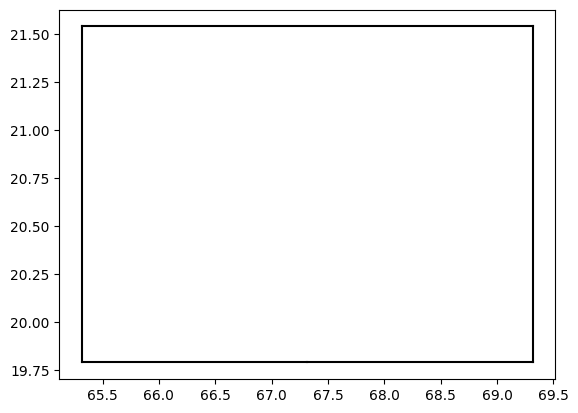

In [1]:
from shapely.geometry import Polygon
from rtree import index
import ezdxf
import time
from cvxopt import solvers, matrix
import numpy as np
import pygame
from shapely.geometry import Point
import shapely.geometry.polygon 
from matplotlib.patches import Polygon
from sympy import linear_eq_to_matrix, symbols
import math
import matplotlib.pyplot as plt
from colormath.color_objects import LabColor, XYZColor
from colormath.color_conversions import convert_color
import matplotlib.transforms as mtransforms
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from scipy.optimize import minimize, LinearConstraint, linprog, least_squares, root,fsolve
# Load the blocks data from the file


phi_nonass =0
blocks = []

cohesion = 0
phi = 33

left_limit = [67.37,16.51]  #left bottom limit of the region where edges have different cohesions and friction angles
right_limit = [69.29,18.325] #right top limit of the region where edges have different cohesions and friction angles
cohesion1 = 0
phi1 = 33

max_comp = 999
max_ten = 0
start_cad = time.time()
fname = ["wall_data_Gilbert.txt","mechanic_data_ex1blocks.txt"]
# Open DXF file
dxf_file = "H:\Python-projects\ex1blocks1nodes.dxf" 
doc = ezdxf.readfile(dxf_file)  # import the dxf file
msp = doc.modelspace() #read data in the file

block_references = msp.query("INSERT") #import block references from the dxf file
support_edges = np.empty((0,2))
edges = [] # Initialize empty list to store edges
ind =0 #block index
allnodes = set() #collect all nodes from the drawing

# Extract all the block references data
for block_reference in block_references:
    points = block_reference.explode() #explode blocks references into polylines
    block_polygon = [] #define a variable to temporarily store current block references in form of polygon 
    vertices = points[0].get_points() # Get polygon vertices
    for element in range(0,len(vertices)): #enumerate all block references vertices
        node_coordinates = tuple([round(vertices[element][0],3),round(vertices[element][1],3)]) #extract nodes coordinates of the current vertex
        allnodes.add(node_coordinates)
        block_polygon.append( [round(vertices[element][0],3),round(vertices[element][1],3) ]) 

    block_polygon  = shapely.geometry.polygon.Polygon(block_polygon)   # convert the current block to a "python" polygon
    #add current block's data to the blocks dictionary which collects all blocks data
    blocks.append({
        'id': ind,
        'polygon': block_polygon
    })
    ind = ind+1 # increase blocks indexing variable by 1

# Extract all polylines data
# Open DXF file
doc = ezdxf.readfile(dxf_file)  # import the dxf file
msp = doc.modelspace() #read data in the file
polygons = msp.query('LWPOLYLINE') # Extract all polygon entities
polygons.extend(msp.query('3DFACE'))
# Iterate over polygons
for poly in polygons:
    block_polygon = []
    # Get polygon vertices
    vertices = poly.get_points()

    for element in range(0,len(vertices)): #enumerate all polylines vertices

        node_coordinates = tuple([round(vertices[element][0],3),round(vertices[element][1],3)]) #extract nodes coordinates of the current vertex
        allnodes.add(node_coordinates)


        block_polygon.append( [round(vertices[element][0],3),round(vertices[element][1],3) ]) 

    block_polygon  = shapely.geometry.polygon.Polygon(block_polygon) # convert the current block to a "python" polygon  
    #add current block's data to the blocks dictionary which collects all blocks data
    blocks.append({
        'id': ind,
        'polygon': block_polygon
    })
    ind = ind+1 # increase blocks indexing variable by 1

#reorganize nodes data
ind = 1 # nodes indexing variable
nodes = np.empty((0,3)) #create an array to reorganize nodes data previously extracted
for element in allnodes: #enumerate all nodes 
    nodes= np.append(nodes,np.array([[ind,element[0],element[1]]]),axis=0) # organize data for the current node (index,xcoor,ycoor)
    ind += 1   # increase node indexing variable by 1  

#Extract attributes
# Open DXF file
doc = ezdxf.readfile(dxf_file)  # import the dxf file
msp = doc.modelspace() #read data in the file
block_references = msp.query("INSERT")
attrib_points =[] 
for block_reference in block_references:
    entity = block_reference  # process all entities
    attrib_points = np.empty((0,2)) # define attribute points vector
    
    for attrib in entity.attribs:
        print(attrib)
        attrib_point = ( attrib.dxf.insert[0],
                         attrib.dxf.insert[1]) # calculate position of an attribute
        attrib_points = np.append(attrib_points,np.array([[round(attrib_point[0],3),round(attrib_point[1],3)]]),axis=0)
    print(attrib_points)
    for element in range(0,len(attrib_points)-1):
        condition1= (nodes[:,1] == attrib_points[element,0]) & (nodes[:,2] == attrib_points[element,1]) #find the position of the first point

        condition2 = (nodes[:,1] == attrib_points[element+1,0]) & (nodes[:,2] == attrib_points[element+1,1]) #find the position of the first point
        print(condition1,condition2)
        if (len(nodes[condition1,:]) !=0) & (len(nodes[condition2,:]) !=0):

            node1_ind = nodes[condition1,:][0][0]   # index of the first node of the attribute
            node2_ind = nodes[condition2,:][0][0] # index of the second node of the attribute
            print(node1_ind,node2_ind)
            support_edges = np.append(support_edges,np.array([[min(node1_ind,node2_ind),max(node1_ind,node2_ind)]]),axis=0) #add indices to the global matrix
    attrib_points =[]

print(support_edges)
# Create an R-Tree index to find neighboring blocks
p = index.Property()
ind = index.Index(properties=p) # extract R-Tree tools
for i, block in enumerate(blocks):
    ind.insert(i, block['polygon'].bounds) #add blocks boundaries 

# Iterate over the blocks and check for connections
edges = np.empty((0,4)) #define edges array
blocks_data = np.empty((0,2)) #define new block
edgeind = 1
unique_nodes = set() #find nodes without repetition
for i in range(len(blocks)):

    block = blocks[i]
    blockunique_nodes = set() #all nodes for the current block

    nearby_blocks = ind.intersection(block['polygon'].bounds) # Find all nearby blocks for the current block using the R-Tree index

    for nearby_block in nearby_blocks:

        # Check if the nearby block is actually connected to the current block
        if block['polygon'].intersects(blocks[nearby_block]['polygon']) or block['polygon'].touches(blocks[nearby_block]['polygon']):

            intersection = block['polygon'].intersection(blocks[nearby_block]['polygon'])

            if isinstance(intersection, shapely.geometry.polygon.Polygon): #if the intersection is a polygon

                xx, yy = intersection.exterior.coords.xy
                for i in range(0,len(xx)):
                    node_coordinates = tuple([xx[i],yy[i]])
                    unique_nodes.add(node_coordinates)
                    blockunique_nodes.add(node_coordinates)

            else: #if the intersection is a line

                for i in range(0,len(intersection.xy[0])):
                    node_coordinates = tuple([intersection.xy[0][i],intersection.xy[1][i]]) 
                    unique_nodes.add(node_coordinates) # add the current node to the nodes list
                    blockunique_nodes.add(node_coordinates) #add the current node to all current block nodes
            #connections.append((block['id'], blocks[nearby_block]['id']))

    block_nodes = np.empty((0,2))  #variable to reorganize the block's data      
    for element in blockunique_nodes:
        block_nodes= np.append(block_nodes,np.array([[element[0],element[1]]]),axis=0) # collect all the current block nodes in a specific array form

    block_nodes = block_nodes.T
    blockjnodesX = np.array(block_nodes[0])
    #print(blockjnodesX)
    blockjnodesY = np.array(block_nodes[1])

    A = [blockjnodesX,blockjnodesY] 
    A = A - np.mean(A,1)[:, None]
    A = np.argsort(np.arctan2(A[1,:],A[0,:]))
    blockjnodesX = blockjnodesX[A]      
    blockjnodesY = blockjnodesY[A]
    blockjnodesX = np.append(blockjnodesX,np.array([blockjnodesX[0]]))
    blockjnodesY = np.append(blockjnodesY,np.array([blockjnodesY[0]]))
    for element in range(0,len(blockjnodesX)-1):

        condition = (nodes[:, 1] == blockjnodesX[element]) & (nodes[:, 2] == blockjnodesY[element]) #look for the first vertex
        vertex1 = nodes[condition, :] #extract first vertex data
        condition = (nodes[:, 1] == blockjnodesX[element+1]) & (nodes[:, 2] == blockjnodesY[element+1]) #look for the first vertex
        vertex2 = nodes[condition, :] #extract first vertex data
        vertex1 = vertex1[0]
        vertex2 = vertex2[0]
        min_ind = int(min(vertex1[0],vertex2[0]))
        max_ind = int(max(vertex1[0],vertex2[0]))
        condition = (edges[:,1] ==min_ind) & (edges[:,2] ==max_ind) # search the current edge in the egdes list
        if len(edges[condition, :]) ==0: #if the edge does not already exist in the list
            edges = np.append(edges,np.array([[int(edgeind),int(min_ind),int(max_ind),int(0)]]),axis =0)
            blocks_data = np.append(blocks_data,np.array([[block['id']+1,edgeind]]),axis =0)
            edgeind +=1
        else: #if the edge already exists in the list
            rep_edgeind = edges[condition, :][0][0] #find the repeated edge index in the list to add it to the block edges column

            edges[int(rep_edgeind)-1][3]=1

            blocks_data = np.append(blocks_data,np.array([[block['id']+1,rep_edgeind]]),axis =0)

# Give value 2 to edges on supports 
for element in support_edges:
    edge_elements  = edges[(edges[:,1] == element[0]) & (edges[:,2] == element[1]) ,:][0] # extract current edge elements
    edges[int(edge_elements[0])-1][3] = 2
    # Print the connections


support_ind = np.empty((0,1)) 
contact_ind = np.empty((0,1))
for element in edges:
    if element[3] == 1:
        contact_ind = np.append(contact_ind,np.array([[str(int(element[0]))]]))
    if element[3] == 2:
        support_ind = np.append(support_ind,np.array([[str(int(element[0]))]]))

blocks  =  blocks_data #create an  array for blocks

strength = np.zeros((len(contact_ind) + len(support_ind),5)) #create an empty array for edges characteristics
strength = strength.astype(str)
strength[:,0] = [*contact_ind,*support_ind]
strength[:,1] = (len(contact_ind) + len(support_ind))*[str(cohesion)]
strength[:,2] = (len(contact_ind) + len(support_ind)) * [str(phi)]
strength[:,3] = (len(contact_ind) + len(support_ind)) * [str(max_comp)]
strength[:,4] = (len(contact_ind) + len(support_ind)) * [str(max_ten)]

if len(support_ind): 
    support =  np.zeros((len(support_ind),4)) #create an empty array for the support data
    support = support.astype(str)
    support[:,0] = support_ind
    support[:,1] = (len(support_ind))*[str(0)]
    support[:,2] = (len(support_ind))*[str(0)]
    support[:,3] = (len(support_ind))*[str(0)]

    strength[-1:][0][1:3] = [cohesion1,phi1]

edges_perm = np.empty((0,4))
for element in range(0,len(edges)):
    edges_perm  = np.append(edges_perm ,np.array([[str(int(edges[element][0])),str(int(edges[element][1])),str(int(edges[element][2])),str(int(edges[element][3]))]]),axis=0)
edges = edges_perm 

blocks_perm = np.empty((0,2))
for element in range(0,len(blocks)):
    blocks_perm  = np.append(blocks_perm ,np.array([[str(int(blocks[element][0])),str(int(blocks[element][1]))]]),axis=0)
blocks = blocks_perm    

nodes_perm = np.empty((0,3))
for element in range(0,len(nodes)):
    nodes_perm  = np.append(nodes_perm ,np.array([[str(int(nodes[element][0])),str(nodes[element][1]),str(nodes[element][2])]]),axis=0)
nodes = nodes_perm   

end_cad = time.time()
print("CAD: " ,end_cad-start_cad, "seconds")

start_prob = time.time()

blocks = blocks_perm
nodes = nodes_perm
edges = edges_perm
Dead_loads = dict()
Dead_loads['Edges'] = dict()
Dead_loads['Blocks'] = dict()
Dead_loads['Edges']['concentrated']= np.empty((0,7))
Dead_loads['Edges']['continuous']= np.empty((0,8))
Dead_loads['Blocks']['concentrated']= np.empty((0,7))
Dead_loads['Blocks']['volume']= np.empty((0,3))
Live_loads = dict()
Live_loads['Edges'] = dict()
Live_loads['Blocks'] = dict()
Live_loads['Edges']['concentrated']= np.empty((0,7))
Live_loads['Edges']['continuous']= np.empty((0,8))
Live_loads['Blocks']['concentrated']= np.empty((0,7))
Live_loads['Blocks']['volume']= np.empty((0,3))
Live_loadsvect = np.empty((0,1))
Dead_loadsvect = np.empty((0,1))
try:
    file = open(fname[0],'r') #check if the file exists
except: 
    print('File can not be opened:',fname) # if the file is not found
    quit()
Textlines = file.readlines() 
file.close()    


# Read the mechanic file 
try:
    file = open(fname[1],'r') #check if the file exists
except: 
    print('File can not be opened:',fname) # if the file is not found
    quit()
Textlines = file.readlines() 
file.close() 
#extract strength data

#extract Loads data
for line in range(4,len(Textlines)):
    if not Textlines[line].startswith('block'):

        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")
            Dead_loads['Edges']['concentrated'] = np.append(Dead_loads['Edges']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0) 

    else:
        line_block_Dccload = line
        break

for line in range(line_block_Dccload+1,len(Textlines)):
    if not Textlines[line].startswith('Continuous'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 

            line_split = line_content.split("\t")

            Dead_loads['Blocks']['concentrated'] = np.append(Dead_loads['Blocks']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0)  
    else:
        line_Edge_Dcnload = line
        break
for line in range(line_Edge_Dcnload+2,len(Textlines)):
    if not Textlines[line].startswith('Block'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")
            Dead_loads['Edges']['continuous'] = np.append(Dead_loads['Edges']['continuous'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6],line_split[7]]]),axis =0)  
    else:
        line_block_Dcnload = line
        break
for line in range(line_block_Dcnload+1,len(Textlines)):
    if not Textlines[line].startswith('Live'):
        if  not Textlines[line]=='\n':
            line_content1 = Textlines[line].rstrip() 
            line_content = Textlines[line_block_Dcnload+1].rstrip()
            line_split = line_content.split("\t")
            line_split1 = line_content1.split("\t")

            Dead_loads['Blocks']['volume'] = np.append(Dead_loads['Blocks']['volume'],np.array([[line_split1[0],line_split[1],line_split[2]]]),axis =0)  
    else:
        line_edge_Lccload = line
        break

for line in range(line_edge_Lccload+3,len(Textlines)):
    if not Textlines[line].startswith('block'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")


            Live_loads['Edges']['concentrated'] = np.append(Live_loads['Edges']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0)  
    else:
        line_block_Lccload = line
        break
for line in range(line_block_Lccload+1,len(Textlines)):
    if not Textlines[line].startswith('Continuous'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip()

            line_split = line_content.split("\t")


            Live_loads['Blocks']['concentrated'] = np.append(Live_loads['Blocks']['concentrated'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6]]]),axis =0)  
    else:
        line_Edge_Lcnload = line
        break

for line in range(line_Edge_Lcnload+2,len(Textlines)):
    if not Textlines[line].startswith('Block'):
        if  not Textlines[line]=='\n':
            line_content = Textlines[line].rstrip() 
            line_split = line_content.split("\t")
            Live_loads['Edges']['continuous'] = np.append(Live_loads['Edges']['continuous'],np.array([[line_split[0],line_split[1],line_split[2],line_split[3],line_split[4],line_split[5],line_split[6],line_split[7]]]),axis =0)  
    else:
        line_block_Lcnload = line
        break
for line in range(line_block_Lcnload+1,len(Textlines)):

    if  not Textlines[line]=='\n':
        line_content1 = Textlines[line].rstrip()
        line_content = Textlines[line_block_Lcnload+1].rstrip()

        line_split = line_content.split("\t")
        line_split1 = line_content1.split("\t")

        Live_loads['Blocks']['volume'] = np.append(Live_loads['Blocks']['volume'],np.array([[line_split1[0],line_split[1],line_split[2]]]),axis =0)  

#edge_ind, edge_rep) = (np.unique(blocks[:,1],return_counts=True)) # find all block interfaces indices (x) and the number of repetation of each one (y)  

#dge_ind = [int(edge_ind[element]) for element in range(len(edge_ind))]
#dge_rep = edge_rep[np.argsort(edge_ind)]
#edge_ind = np.sort(np.array(edge_ind))
#edges[:,3] = [int(element) for element in (edge_rep != np.ones(len(edge_rep)))]
#for element in range(0,len(edges)):
  #  if not len(np.where(support[:,0] == edges[element][0])[0]) ==0:
 #       edges[element][3] ='2'
allequations =[]; # system of equilibrium equations 
allvar = []; #collect all interfaces variables
blockscenters = np.array([])
activeEdgesInd = np.empty((0,1)) # collect all active edges indices 
i=0 #block indexing variable
testvect = np.empty((0,1)) # check whether each edge variable is equal to zero
strength = [[float(strength[element1][element2]) for element2 in range(0,strength.shape[1]) ]for element1 in range(0,strength.shape[0])]
strength = np.array(strength) 
C=np.array([[]]); #define the rupture criteria matrix
C_nonass = np.array([[]]); #define the rupture criteria matrix for non ass
coh = np.empty((0,1)) #cohesion vector
allpolygons = dict() # collect all blocks as polygons
edgesIndCoor = dict() # collect all edges for drawing (with repetition)
blockedgesInd = dict() #collect block index for each edge in the variable edgesIndCoor
while i < len(blocks):
    Live_loadsvect = np.append(Live_loadsvect, np.array([[0],[0],[0]]),axis=0) #add lines for the block j live loads
    Dead_loadsvect = np.append(Dead_loadsvect, np.array([[0],[0],[0]]),axis=0) #add lines for the block j dead loads
    j = int(blocks[i][0] ) #block index

    c=np.where( blocks[:,0] ==str(j ))    # collect the coordinates of vertices belonging to the block 

    x = blocks[c[0]]
    y = [[   int(edges[int(x[element][1])-1][1]), int(edges[int(x[element][1])-1][2])  ]  for element in range(len(x)) ]
    z1 = [[   float(nodes[int(y[element][0])-1][1]), float(nodes[int(y[element][0])-1][2])  ]  for element in range(len(y)) ]
    z2 = [[   float(nodes[int(y[element][1])-1][1]), float(nodes[int(y[element][1])-1][2])  ]  for element in range(len(y)) ]
    blockjnodes = z1+z2
    blockjnodes = np.unique(blockjnodes,axis=0)
    blockjnodes = list(zip(*blockjnodes))

    blockjnodesX = np.array(blockjnodes[0])
    blockjnodesY = np.array(blockjnodes[1])

    A = [blockjnodesX,blockjnodesY] 
    A = A - np.mean(A,1)[:, None]
    A = np.argsort(np.arctan2(A[1,:],A[0,:]))
    blockjnodesXsort = blockjnodesX[A]    # x coordinates of all vertices of block j  
    blockjnodesYsort = blockjnodesY[A]     # y coordinates of all vertices of block j
    x = np.column_stack((blockjnodesXsort,blockjnodesYsort))
    polygon = shapely.geometry.polygon.Polygon(x)  #convert x to an area
    allpolygons[str(j)] = x
    area = polygon.area # calculate the area of the block j
    blockjcenter = np.array([polygon.centroid.xy[0][0],polygon.centroid.xy[1][0]]) # center of gravity of the block j
    blockscenters = np.concatenate((blockscenters,np.array([polygon.centroid.xy[0][0],polygon.centroid.xy[1][0]])))
    #Add blocks dead and live loads
    #check volumetric live loads
    blockjLoadcheck = np.where(Live_loads['Blocks']['volume'][:,0] ==str(j))[0]
    blockjliveX = 0
    blockjliveY = 0
    blockjmoment = 0

    # Calculate live loads vector for block j
    #step 1: volumetric live loads
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            blockjliveX = blockjliveX + float(Live_loads['Blocks']['volume'][int(element)][1])*area
            blockjliveY = blockjliveY + float(Live_loads['Blocks']['volume'][int(element)][2])*area
            
    # step 2: concentrated live loads
    blockjLoadcheck = np.where(Live_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            refpointX = float(nodes[int(Live_loads['Blocks']['concentrated'][element][4])-1][1])
            refpointY = float(nodes[int(Live_loads['Blocks']['concentrated'][element][4])-1][2])

            pointloadX = refpointX + float(Live_loads['Blocks']['concentrated'][element][5])
            pointloadY =  refpointY + float(Live_loads['Blocks']['concentrated'][element][6]) #are the coor sorted !
            loadX = float(Live_loads['Blocks']['concentrated'][element][1])
            loadY = float(Live_loads['Blocks']['concentrated'][element][2])
            moment = float(Live_loads['Blocks']['concentrated'][element][3])
            blockjliveX = blockjliveX + loadX  
            blockjliveY = blockjliveY + loadY
            blockjmoment = blockjmoment + moment + \
                           np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

    Live_loadsvect[-3:] = np.array([[blockjliveX],[blockjliveY],[blockjmoment]]) # add block j live loads to the live loads vector

    # Calculate dead loads vector for block j
    blockjLoadcheck = np.where(Dead_loads['Blocks']['volume'][:,0] ==str(j))[0]
    blockjdeadX = 0
    blockjdeadY = 0
    blockjmoment = 0
    #step 1: volumetric dead loads
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            blockjdeadX = blockjdeadX + float(Dead_loads['Blocks']['volume'][int(element)][1])*area
            blockjdeadY = blockjdeadY + float(Dead_loads['Blocks']['volume'][int(element)][2])*area

    # step 2: concentrated dead loads
    blockjLoadcheck = np.where(Dead_loads['Blocks']['concentrated'][:,0] ==str(j))[0]
    if not len(blockjLoadcheck) ==0:
        for element in blockjLoadcheck:

            refpointX = float(nodes[int(Dead_loads['Blocks']['concentrated'][element][4])-1][1])
            refpointY = float(nodes[int(Dead_loads['Blocks']['concentrated'][element][4])-1][2])

            pointloadX = refpointX + float(Dead_loads['Blocks']['concentrated'][element][5])
            pointloadY =  refpointY + float(Dead_loads['Blocks']['concentrated'][element][6]) #are the coor sorted !


            loadX = float(Dead_loads['Blocks']['concentrated'][element][1])
            loadY = float(Dead_loads['Blocks']['concentrated'][element][2])
            moment = float(Dead_loads['Blocks']['concentrated'][element][3])

            blockjdeadX = blockjdeadX + loadX  
            blockjdeadY = blockjdeadY + loadY
            blockjmoment = blockjmoment + moment + \
                           np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

    Dead_loadsvect[-3:] = np.array([[blockjdeadX],[blockjdeadY],[blockjmoment]]) # add block j dead loads to the live loads vector
    blockjvector = []; # edges vectors of the block j

    while int(blocks[i][0]) == j:          # extracting all edges of the block j

        vertex1 = nodes[int(edges[int(blocks[i][1])-1][1])-1] #extract the data of the first vertex of an edge
        vertex2 = nodes[int(edges[int(blocks[i][1])-1][2])-1] #extract the data of the second vertex of an edge
        vertex1coor = np.array([float(vertex1[element]) for element in range(1,len(vertex1))  ])
        vertex2coor = np.array([float(vertex2[element]) for element in range(1,len(vertex2)) ])
        edgeindex = edges[int(blocks[i][1])-1][0] # current edge index
        edgesIndCoor[str(i+1)] = np.array([[edgeindex,vertex1coor[0],vertex2coor[0],vertex1coor[1],vertex2coor[1]]]) #find edges indices with repetition
        blockedgesInd[str(i+1)] = j #find blocks the current edge belongs to
        plt.plot([vertex1coor[0],vertex2coor[0]], [vertex1coor[1],vertex2coor[1]],'k' )

        edgelength = math.sqrt((vertex1coor[0]-vertex2coor[0])**2 + (vertex1coor[1]-vertex2coor[1])**2 )          
        #Add edge dead and live loads
        edgeLoadcheck = np.where( Live_loads['Edges']['continuous'][:,0] == edgeindex)[0]
        edgeliveX = 0
        edgeliveY = 0
        edgemoment = 0
        #step 1: continuous Live loads
        if not len(edgeLoadcheck) ==0:

            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Live_loads['Edges']['continuous'][element][3])-1][1])
                refpointY = float(nodes[int(Live_loads['Edges']['continuous'][element][3])-1][2])

                startpointloadX = refpointX + float(Live_loads['Edges']['continuous'][element][4])
                startpointloadY =  refpointY + float(Live_loads['Edges']['continuous'][element][5]) #are the coor sorted !

                endpointloadX = refpointX + float(Live_loads['Edges']['continuous'][element][6])
                endpointloadY =  refpointY + float(Live_loads['Edges']['continuous'][element][7])

                pointloadX = (startpointloadX +  endpointloadX)/2
                pointloadY = (startpointloadY +  endpointloadY)/2

                Loadlength = math.sqrt((startpointloadX-endpointloadX)**2 + (startpointloadY-endpointloadY)**2 ) 

                loadX = float(Live_loads['Edges']['continuous'][element][1])*Loadlength
                loadY = float(Live_loads['Edges']['continuous'][element][2])*Loadlength

                edgeliveX = edgeliveX + loadX  
                edgeliveY = edgeliveY  + loadY
                edgemoment = edgemoment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]


        #step 2: concentrated live loads
        edgeLoadcheck = np.where( Live_loads['Edges']['concentrated'][:,0] == edgeindex)[0]
        if not len(edgeLoadcheck) ==0:
            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Live_loads['Edges']['concentrated'][element][4])-1][1])
                refpointY = float(nodes[int(Live_loads['Edges']['concentrated'][element][4])-1][2])

                pointloadX = refpointX + float(Live_loads['Edges']['concentrated'][element][5])
                pointloadY =  refpointY + float(Live_loads['Edges']['concentrated'][element][6])

                loadX = float(Live_loads['Edges']['concentrated'][element][1])
                loadY = float(Live_loads['Edges']['concentrated'][element][2])
                moment = float(Live_loads['Edges']['concentrated'][element][3])

                edgeliveX = edgeliveX + loadX  
                edgeliveY = edgeliveY  + loadY
                edgemoment = edgemoment + moment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

        Live_loadsvect[-3:] = Live_loadsvect[-3:] + \
        np.array([[edgeliveX],[edgeliveY],[edgemoment]]) # add edges live loads to the dead loads vector  



        #step 3: continuous dead loads
        edgeLoadcheck = np.where( Dead_loads['Edges']['continuous'][:,0] == edgeindex)[0]
        edgedeadX = 0
        edgedeadY = 0
        edgemoment = 0

        if not len(edgeLoadcheck) ==0:
            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Dead_loads['Edges']['continuous'][element][3])-1][1])
                refpointY = float(nodes[int(Dead_loads['Edges']['continuous'][element][3])-1][2])

                startpointloadX = refpointX + float(Dead_loads['Edges']['continuous'][element][4])
                startpointloadY =  refpointY + float(Dead_loads['Edges']['continuous'][element][5]) #are the coor sorted !

                endpointloadX = refpointX + float(Dead_loads['Edges']['continuous'][element][6])
                endpointloadY =  refpointY + float(Dead_loads['Edges']['continuous'][element][7])

                pointloadX = (startpointloadX +  endpointloadX)/2
                pointloadY = (startpointloadY +  endpointloadY)/2

                Loadlength = math.sqrt((startpointloadX-endpointloadX)**2 + (startpointloadY-endpointloadY)**2 ) 

                loadX = float(Dead_loads['Edges']['continuous'][element][1])*Loadlength
                loadY = float(Dead_loads['Edges']['continuous'][element][2])*Loadlength

                edgedeadX = edgedeadX + loadX  
                edgedeadY = edgedeadY  + loadY
                edgemoment = edgemoment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]


        #step 4: concentrated dead loads
        edgeLoadcheck = np.where( Dead_loads['Edges']['concentrated'][:,0] == edgeindex)[0]
        if not len(edgeLoadcheck) ==0:
            for element in edgeLoadcheck:
                refpointX = float(nodes[int(Dead_loads['Edges']['concentrated'][element][4])-1][1])
                refpointY = float(nodes[int(Dead_loads['Edges']['concentrated'][element][4])-1][2])

                pointloadX = refpointX + float(Dead_loads['Edges']['concentrated'][element][5])
                pointloadY =  refpointY + float(Dead_loads['Edges']['concentrated'][element][6])

                loadX = float(Dead_loads['Edges']['concentrated'][element][1])
                loadY = float(Dead_loads['Edges']['concentrated'][element][2])
                moment = float(Dead_loads['Edges']['concentrated'][element][3])

                edgedeadX = edgedeadX + loadX  
                edgedeadY = edgedeadY  + loadY
                edgemoment = edgemoment + moment + \
                               np.cross(-np.array(blockjcenter)+np.array([[pointloadX,pointloadY]]),np.array([[loadX,loadY]]))[0]

        Dead_loadsvect[-3:] = Dead_loadsvect[-3:] + \
        np.array([[edgedeadX],[edgedeadY],[edgemoment]]) # add edges dead loads to the dead loads vector    


        if not int(edges[int(blocks[i][1])-1][3]) == 0:

            edgevector = vertex1coor - vertex2coor  # find the direction of the edge
            edgevector = edgevector / np.linalg.norm(edgevector) # find a unit vector 

            normalvector = np.array([-edgevector[1], edgevector[0]]) #find the normal to the edge
                     #check whether yhe normal is inward or outward ?
            edgecenter = ((vertex1coor[0]+vertex2coor[0]) /2, (vertex1coor[1]+vertex2coor[1]) /2) # find the center of the edge
            testpoint = edgecenter + 0.001*normalvector # find a new point very close to the edge center following the direction 'normal vector'  
            #A = [blockjnodesX,blockjnodesY] 
            #A = A - np.mean(A,1)[:, None]
            #A = np.argsort(np.arctan2(A[1,:],A[0,:]))
            #blockjnodesX = blockjnodesX[A]    # x coordinates of all vertices of block j  
            #blockjnodesY = blockjnodesY[A]     # y coordinates of all vertices of block j
            #x = np.column_stack((blockjnodesX,blockjnodesY))
            #polygon = Polygon(x)  #convert x to an area
            #blockjcenter = np.array([polygon.centroid.xy[0][0],polygon.centroid.xy[1][0]]) # center of gravity of the block j
            #print( Point(testpoint[0],testpoint[1]).within(polygon))
            if  not Point(testpoint[0],testpoint[1]).within(polygon):
                normalvector = -normalvector
                edgevector = -edgevector 
            #print(normalvector,edgevector)
            blockjvector.append(edgevector) 
            blockjvector.append(normalvector) 
            blockjvector.append(vertex1) 
            blockjvector.append(vertex2) 
            blockjvector.append(int(edges[int(blocks[i][1])-1][3])) # 0 1 or 2
            blockjvector.append(int(edges[int(blocks[i][1])-1][0])) # edge index
            #print(blockjvector[0])
        i+=1
        if i == len(blocks):
            break
    blockjvar =[]; # all edge variables (t,n &m) for the block j
    blockjeq1 = 0 # block equilibrium equation in x direction
    blockjeq2 = 0 # block equilibrium equation in y direction
    blockjeq3 = 0 # block equilibrium equation (moment)  


    for v in range(0,len(blockjvector),6):
        testx = 1
        testy = 1
        testm = 1
        currentEdgeInd = blockjvector[v+5] 
        minInd = min(blockjvector[v+2][0],blockjvector[v+3][0]) #find the min index of the vertex of an edge
        maxInd = max(blockjvector[v+2][0],blockjvector[v+3][0]) #find the max index of the vertex of an edge 
        nsym= symbols('n'+minInd+maxInd) # normal reaction at an edge, symbolic representation 
        tsym= symbols('t'+minInd+maxInd) # shear at an edge, symbolic representation 
        msym = symbols('m'+minInd+maxInd) # moment at an edge, symbolic representation 
        if blockjvector[v+4] == 2:

            testx = (support[(np.where(support[:,0] == str( blockjvector[v+5])))[0][0]][1] == '0')*1 #test if the support prevents disp in x direction
            testy = (support[(np.where(support[:,0] == str( blockjvector[v+5])))[0][0]][2] == '0')*1 #test if the support prevents disp in y direction
            testm = (support[(np.where(support[:,0] == str( blockjvector[v+5])))[0][0]][3] == '0')*1  #test if the support prevents rotation around z


        n= blockjvector[v+1]*nsym # normal vector, symbolic representation
        t= blockjvector[v]*tsym # shear vector, symbolic representation
        edgenode1 = [float(blockjvector[v+2][1]),float(blockjvector[v+2][2]) ] #first node coordinates
        edgenode2 = [float(blockjvector[v+3][1]),float(blockjvector[v+3][2]) ] # second node coordinates
        edgecenter = [np.mean([float(blockjvector[v+2][1]),float(blockjvector[v+3][1])]), np.mean([float(blockjvector[v+2][2]),float(blockjvector[v+3][2])])]
        edgelength = np.linalg.norm(np.array(edgenode1)-np.array(edgenode2))
        if len(np.where(blockjvar == nsym)[0]) == 0:
             #Add the equations corresponding to a new edge to the problem of the block j 
            blockjeq1 = blockjeq1 + (n[0]+t[0])
            blockjeq2 = blockjeq2 + (n[1]+t[1])
            blockjeq3 = blockjeq3 + np.cross(-np.array(blockjcenter)+np.array(edgecenter),np.array([[n[0] +t[0] ,0]])) + \
            np.cross(-np.array(blockjcenter)+np.array(edgecenter),np.array([[0,n[1] +t[1] ]]))

            if blockjvector[v+1][1] ==0:
                if blockjvector[v+1][0] > 0:
                    blockjeq3 = blockjeq3 - msym*edgelength/2
                else:
                    blockjeq3 = blockjeq3 + msym*edgelength/2
            else:
                if blockjvector[v+1][1] > 0:
                    blockjeq3 = blockjeq3 + msym*edgelength/2
                else:
                    blockjeq3 = blockjeq3 - msym*edgelength/2

            #Add the new edge variables to the previous variables        

            if len(np.where(allvar == nsym)[0]) == 0:
                activeEdgesInd = np.append(activeEdgesInd,np.array([currentEdgeInd]))
                testvect = np.append(testvect,np.array([testx,testy,testm]))
                blockjvar = np.append(blockjvar,np.array([tsym,nsym,msym ]))
                allvar = np.append(allvar,np.array([tsym,nsym,msym ]))
                # Create the rupture criteria matrix C
                ind = np.where( strength[:,0] == currentEdgeInd)[0] #find the index of an edge in the strength array
                if not len(ind) ==0:
                    
                    C_add =np.array([[1,-math.tan(math.radians(strength[ind[0]][2])),0],[-1,-math.tan(math.radians(strength[ind[0]][2])),0],
                       [0,-1,1],[0,-1,-1],[0,-1,0],[0,1,0]]) #find new block of the matrix C
                    C = np.block([[C,np.zeros((C.shape[0],3))],[np.zeros((6,C.shape[1])),C_add]]) #Add a new block to the matrix C 
                    
                    C_add  =np.array([[1,-math.tan(math.radians(phi_nonass)),0],[-1,-math.tan(math.radians(phi_nonass)),0],
                       [0,-1,1],[0,-1,-1],[0,-1,0],[0,1,0]]) #find new block of the matrix C_non ass
                    
                    C_nonass =   np.block([[C_nonass,np.zeros((C_nonass.shape[0],3))],[np.zeros((6,C_nonass.shape[1])),C_add]]) #Add a new block to the matrix C non ass                 
                    
                    coh_add = np.array([strength[ind[0]][1]*edgelength,strength[ind[0]][1]*edgelength,0,0,strength[ind[0]][4],strength[ind[0]][3]])

                    coh = np.append (coh,coh_add)

    #Add the problems of the block j to the global problem
    allequations = np.append(allequations,np.array(blockjeq1))
    allequations = np.append(allequations,np.array(blockjeq2))
    allequations = np.append(allequations,np.array(blockjeq3))
#Write the linear equations problem in matrix form
B,b = linear_eq_to_matrix(allequations,allvar)
B = np.array(B)

Astat=B

C = np.delete(C,0,axis=0)
C_nonass = np.delete(C_nonass,0,axis=0)
Cstat = np.append(C,np.zeros((C.shape[0],1)),axis=1)

B = B.astype(float)
testrankmatrix = np.dot(B.T,B)
#testrankmatrix = B.T
#print(np.linalg.eigvals(testrankmatrix))
print("Matrix B.BT: dimension " + str(testrankmatrix.shape[0])+"x" + str(testrankmatrix.shape[1]) + \
      " Rank " + str(np.linalg.matrix_rank(testrankmatrix)))
cohkin = coh


end_prob = time.time()
print("Problem built-up",end_prob-start_prob, "seconds")
#Static approach

bstat = Dead_loadsvect
for element in np.where(testvect == 0)[0]: # add boundary conditions to A
    new_line = np.zeros(Astat.shape[1]) 
    new_line[element] = 1        # create a line corresponding to a boundary condition
    Astat = np.append(Astat,[new_line],axis=0) #add the created line to A
    Live_loadsvect = np.append(Live_loadsvect,np.array([[0]]),axis=0)
    bstat = np.append(bstat,np.array([[0]]),axis=0)
    cohkin = np.append(cohkin,np.array([[0]]))

Astat = np.append(Astat,Live_loadsvect,axis=1)

    
zmix = np.array([*np.zeros(Astat.shape[1] -1),1.0]) # objective mix 
zstat = matrix(np.array([*np.zeros(Astat.shape[1] -1),-1.0])) 
Astat = Astat.astype(np.double)
bstat = Dead_loadsvect 
count = len(bstat)

while not count == Astat.shape[0]:
    bstat = np.append(bstat,np.array([[0]]))
    count = count+1
#b= np.array(b).T
print(Astat.shape,Cstat.shape)

# reserve data for scipy
A1 = []
A1 = np.array(Astat) # reserve data for scipy
A = np.vstack((A1, Cstat))
firstIndZ = A1.shape[1] # first element's index of the Z vector
numbZ = Cstat.shape[0]  #number of elements of the vector Z
A1 = np.hstack((A1, np.zeros((A1.shape[0],Cstat.shape[0]))))

#LinearConstraint(A,np.array(-bstat),np.array(-bstat))
A1 = np.vstack((A1,np.hstack((np.array(Cstat),np.eye(Cstat.shape[0]))))) # reserve data for scipy
print(A1.shape,len(bstat),len(coh))
G1 = np.hstack((np.zeros((Cstat.shape[0],Astat.shape[1])),-np.eye(Cstat.shape[0])))
print(G1.shape)
ulb1 = np.append(-bstat,coh) 

print(len(ulb1))

alpha = 0.3
beta = 0.3

all_normallimit = np.empty((0,Astat.shape[1]))

for element in range(1,Astat.shape[1]-1,3):
    normallimit = np.zeros(Astat.shape[1])
    normallimit[element] =-1
    all_normallimit = np.append(all_normallimit,np.array([normallimit]),axis=0)
    coh = np.append(coh,np.array([-0])) 
    
Cstat = np.array(Cstat)
Cstat =np.append(Cstat,all_normallimit,axis = 0) 
print(Cstat)
#static approach calculation
Cstat = matrix(np.array(Cstat))
cohstat = matrix(coh)

Astat = np.append(Astat, np.array([[0,1,-6,0,-1,-6,0]]),axis=0)
bstat = np.append(bstat,np.array([-0]))

Astat = matrix(Astat)
#b = matrix(b.T)
bstat = matrix(bstat)
start = time.time()
statsolver = solvers.lp(zstat,Cstat,cohstat,Astat,-bstat)
end = time.time()
print(Astat.size,bstat.size,Cstat.size,cohstat.size,zstat.size)
print(statsolver['primal objective'])
statsol = statsolver['x']
print(len(statsolver['x']),len(statsolver['y']),len(statsolver['z']))
print("Static approach: ", end - start, "seconds")

#first =  np.array(kinsolver['x'])
second = np.array(statsolver['y'])
third = np.array(statsolver['z'])
fourth = np.append(second,third)
print("static:", len(statsolver['x']),len(statsolver['y']) ,len(statsolver['z']))
#print("kinematic:", len(kinsolver['x']),len(kinsolver['y']) ,len(kinsolver['z']))
#fifth = np.column_stack((first,fourth))
#print(max(fifth[:,0]-fifth[:,1]))


tol =1
itr = 0
#statsol = np.random.rand(len(statsol))*0.9
statsol =statsol
while tol >0.0001:
    if alpha <= 0.0001:
        alpha = 0.0001
    else:
        alpha = alpha/2
    print("alpha",alpha)
    Cstat = np.array(Cstat)
    for element in range(0,Astat.size[1]-1,3):
        Cstat[element*2][1+element] = -Cstat[element*2][1+element]*alpha
        
        Cstat[element*2+1][1+element] = -Cstat[element*2+1][1+element]*alpha
    
    if itr>1:
        normalvalues_old = normalvalues
        statsolver_old = statsolver['primal objective']
    
    shearvalues = np.empty((0,1))
    normalvalues = np.empty((0,1))
    momentvalues = np.empty((0,1))
    rup_test = np.empty((0,1))
    for element in range(0,len(statsol)-2,3):
        shearvalues = np.append(shearvalues,statsol[element])
        normalvalues = np.append(normalvalues,statsol[element+1])
        momentvalues = np.append(momentvalues,statsol[element+2])


    for element in range(0,int((Astat.size[1]-1)/3),1):
        if itr >1:
            cohstat[element*6] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*(beta*normalvalues[element] + (1-beta)*normalvalues_old[element])
            cohstat[element*6+1] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*(beta*normalvalues[element] + (1-beta)*normalvalues_old[element])
        else:
            cohstat[element*6] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*normalvalues[element] 
            cohstat[element*6+1] = 0.00001*max(normalvalues) + (1+alpha)*math.tan(math.radians(strength[ind[0]][2]))*normalvalues[element]
    
    Cstat = matrix(Cstat)
    start = time.time()
    
    #statsolver = solvers.lp(zstat,Cstat,cohstat,Astat,-bstat)
    end = time.time()
    #statsol = statsolver['x']
    #print(Astat.size,bstat.size,Cstat.size,cohstat.size,zstat.size)
    print(statsolver['primal objective'])
    if itr >1:
        tol = abs(statsolver['primal objective']-statsolver_old)/abs(statsolver['primal objective'])
        print("tol", tol)
    itr = itr+1
    
Z0 = np.array(cohstat) - np.dot(np.array(Cstat),np.array(statsol))

Z0 = Z0*0.1
Z0 = np.array([np.random.rand(len(Z0))]).T*0.01

for element in range(0,len(Z0)):
    Z0[element] = round(float(Z0[element]),3)



cohkh = np.array(coh - Z0.T).T

ulb1kh = []
print(len(np.append(-bstat,cohkh)))
ulb1kh = np.append(-bstat,cohkh) # b vector (Ax =b) for Khalil approach     


def f(x):
    return  x.T @ np.array(zstat)

lb = np.append(-bstat,-np.inf*np.ones(len(cohstat)))
ub = np.append(-bstat,cohstat)
#print(A.shape,len(lb),len(ub))

linear_constraint = LinearConstraint(A, lb,ub)
#print("hii")
x0 = np.array(statsol)*0
x0 = np.array([np.random.rand(len(x0))]) 
#res = minimize(f, x0, method='SLSQP', constraints=linear_constraint)
#print(res)
#check1 = np.dot(A,res.x)
#print(check1)


    #Kinematic approach

B = B.astype(np.double)
Akin = Astat.T
#Akin = np.array([[row[i] for i in range(len(row)) if i != B.shape[1]-1] for row in B])

zkin = -matrix(np.append(Dead_loadsvect,-cohkin))
Akin = np.append(B.T,C.T,axis=1)

for element in np.where(testvect == 0)[0]: # add boundary conditions to A
    new_line = np.zeros((Akin.shape[0],1)) 
    new_line[element] = 1        # create a line corresponding to a boundary condition
    #allnew_line = np.append(allnew_line,[new_line],axis=0) 
    Akin = np.append(Akin,np.array(new_line),axis=1) #add the created line to A

Akin = np.array( [np.append(Live_loadsvect,np.zeros(len(zkin)-len(Live_loadsvect))), *Akin ])
bkin = np.array([1,*np.zeros(Akin.shape[0]-1)])
#Gkin = np.block([[np.zeros((len(Dead_loadsvect),len(zkin)))],[np.zeros((len(zkin)-len(Dead_loadsvect),len(Dead_loadsvect))),-np.eye((len(zkin)-len(Dead_loadsvect)))]])
Gkin = np.block([np.zeros((len(zkin)-len(Dead_loadsvect),len(Dead_loadsvect))),-np.eye((len(zkin)-len(Dead_loadsvect)))])

#reserve data for scipy
firstIndd = A1.shape[1] + 3*len(allpolygons) # first element's index of the d vector
numbd = Gkin.shape[0]  #number of elements of the vector d
A2 = []
A2 = np.append(B.T,C_nonass.T,axis=1)


A2 = np.array( [np.append(Live_loadsvect,np.zeros(len(zkin)-len(Live_loadsvect))), *A2 ])
G2 = Gkin
d0 = np.array(statsolver['z'])

d0 = np.array([np.random.rand(len(d0))]).T*0.1

ulb2 = bkin

ulb2kh = bkin - np.append(np.array([0]),np.dot(C_nonass.T,d0)) #second part of the b vector (Ax =b ) for khalil method



#Kinematic approach calculation

Gkin = matrix(Gkin)
hkin = np.zeros(len(zkin)-len(Dead_loadsvect))
hkin = matrix(hkin)
Akin = matrix(Akin)
bkin=matrix(bkin)

start1 = time.time()
kinsolver = solvers.lp(zkin,Gkin,hkin,Akin,bkin)
end1 = time.time()
print(Akin.size,bkin.size,Gkin.size,hkin.size,zkin.size)
print("Kinematic approach: ", end1 - start1, "seconds")
print(kinsolver['primal objective'])
#print(sol['x'])
#kinsol = kinsolver['x']*5

#first =  np.array(kinsolver['x'])
second = np.array(statsolver['y'])
third = np.array(statsolver['z'])
fourth = np.append(second,third)
print("static:", len(statsolver['x']),len(statsolver['y']) ,len(statsolver['z']))
#print("kinematic:", len(kinsolver['x']),len(kinsolver['y']) ,len(kinsolver['z']))
#fifth = np.column_stack((first,fourth))
#print(max(fifth[:,0]-fifth[:,1]))
kinsol = resnonlin


def merge_block(matrix1,matrix2):
    
    result = np.block([[matrix1, np.zeros((matrix1.shape[0], matrix2.shape[1]))],
                       [np.zeros((matrix2.shape[0], matrix1.shape[1])), matrix2]])
    return result

A = merge_block(A1,A2)
zmix = np.append(zmix,np.zeros(A.shape[1]-len(zmix)))

nonlinline = np.zeros(len(zmix))
nonlinline[firstIndZ:firstIndZ+numbZ] = d0.T
nonlinline[firstIndd:firstIndd+numbd] = Z0.T
#A = np.append(A,np.array([nonlinline]),axis=0)


G= merge_block(G1,G2)
ulb = np.append(ulb1,ulb2)
#ulb = np.append(ulb,-np.dot(Z0.T,d0))

ub = np.zeros(G.shape[0]) #for inequalities
lb = -999*np.ones(G.shape[0])  #for inequalities

linear_constraint1 = LinearConstraint(A, ulb,ulb) #equalities"
linear_constraint2 =  LinearConstraint(G, lb,ub)





def constraint(x):
    nonlinear_constraint = 0.0001
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element] 
        #nonlinear_constraint = [*nonlinear_constraint, 0.000000000000000000000000000000001-x[firstIndZ + element]*x[firstIndd + element]]
        #nonlinear_constraint -= (x[firstIndZ + element]-x0[firstIndZ + element])*x0[firstIndd + element] + \
         #                         x0[firstIndZ + element]*(x[firstIndd + element]-x0[firstIndd + element]) + \
          #                       x0[firstIndZ + element]*x0[firstIndd + element] + (x[firstIndZ + element]-x0[firstIndZ + element])*(x[firstIndd + element]-x0[firstIndd + element])
    #if nonlinear_constraint > -0.001:
     #   nonlinear_constraint = 0
    return [nonlinear_constraint,x[1]-0.01,x[1]-0.01,x[4]-0.01,x[7]-0.01,x[10]-0.01,x[13]-0.01,x[16]-0.01,x[19]-0.01,x[22]-0.01]


def constraintroot(x):
    nonlinear_constraint = 0.00001
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element] 
        #nonlinear_constraint = [*nonlinear_constraint, 0.000000000000000000000000000000001-x[firstIndZ + element]*x[firstIndd + element]]
    return nonlinear_constraint



    
    

def objective(x):
    nonlinear_constraint = 0.001
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= (x[firstIndZ + element]-x0[firstIndZ + element])*x0[firstIndd + element] + \
                                  x0[firstIndZ + element]*(x[firstIndd + element]-x0[firstIndd + element]) + \
                                 x0[firstIndZ + element]*x0[firstIndd + element] + (x[firstIndZ + element]-x0[firstIndZ + element])*(x[firstIndd + element]-x0[firstIndd + element])
        #nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element]    
    
    #return  x.T @ zmix + 9999*max(0,-nonlinear_constraint)

    return  x.T @ zmix 

def jac_constraint(x):
    jac_constraint = np.zeros(len(zmix))
    for element in range(0,numbZ):
        jac_constraint[element+firstIndZ] = -x[element + firstIndd] 
        jac_constraint[element+firstIndd] = -x[element + firstIndZ]
    return jac_constraint

def hess_constraint(x):
    hess_constraint = 0*np.eye(len(zmix))
    for element in range(0,numbZ):
        hess_constraint[element+firstIndZ][element + firstIndd] = -1
        hess_constraint[element+firstIndd][element + firstIndZ] = -1
    return hess_constraint

def jac_objective(x):
    jac_objective = np.zeros(len(zmix))
    jac_objective[Astat.size[1]-1] = 1
    
    nonlinear_constraint = 0
    #nonlinear_constraint = []
    for element in range(0,numbZ):
        nonlinear_constraint -= x[firstIndZ + element]*x[firstIndd + element]    
    
    if not (nonlinear_constraint == 0): 
        jac_objective[element+firstIndZ] = 99*x[element + firstIndd] 
        jac_objective[element+firstIndd] = 99*x[element + firstIndZ]
        
        
    return jac_objective

def hess_objective(x):
    hess_objective = 0*np.eye(len(zmix))
    return hess_objective
#con= {'type': 'ineq', 'fun': constraint,'jac': jac_constraint,'hess':hess_constraint  }
con= {'type': 'ineq', 'fun': constraint }
    #print("hii")
conroot= {'type': 'ineq', 'fun': constraintroot }    
x0 = np.append(np.array(statsol),np.append(Z0 ,fourth))
x0root = np.append(np.array(statsol),np.append(Z0 ,fourth))*0.1

#x0 = 0*res.x
#x0root = 0*res.x

#10*np.ones(A.shape[1]-len(fourth)-len(np.array(statsol)))
b1 = (0,None)
b2 = (None,None)

#bnds = ((b2,)*(Astat.size[1]-1) + (b1,)*(1) + b3 + (b2,)*Astat.size[0]  + b4 )
bnds = ((b2,)*(Astat.size[1]-1) + (b1,)*(1+Cstat.size[0]) + (b2,)*Astat.size[0]  + (b1,)*Cstat.size[0])


#root = fsolve (equations = [linear_constraint1,linear_constraint2,conroot],x0root)
#print(root)
zmixtest = -zmix
red = 1
all_fun = []
all_sol = np.empty((0,len(x0)))
for itr in range(0,20):
    start = time.time()
    x0 = np.random.rand(len(x0))
    #x0[Cstat.size[0]] = 0
    #x0 = resnonlin['x']
    resnonlin = minimize(objective, x0, method='SLSQP',bounds =bnds, constraints=[linear_constraint1,con], tol=1e-6,options = {'ftol': 1e-6, 'disp': True,'maxiter': 20000})
    end = time.time()
    print("hi")
    print("non-linear approach-scipy: ", end - start, "seconds")
    print(resnonlin)
    
    if resnonlin['success']:
        all_fun.append( resnonlin['fun'])
        all_sol = np.append(all_sol, np.array([resnonlin['x'].T]),axis=0 )
        

#kinsol = res.x[-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*5
nonlinear_constraint = 0
    #nonlinear_constraint = []
#for element in range(0,numbZ):
#    nonlinear_constraint -= resnonlin['x'][firstIndZ + element]*resnonlin['x'][firstIndd + element]    

#return  x.T @ zmix + 9999*max(0,-nonlinear_constraint)      

#khalil method

#Z0 =  resnonlin['x'][firstIndZ:firstIndZ+numbZ]
#d0 =  resnonlin['x'][firstIndd:firstIndd+numbd]


A = merge_block(A1,A2)
G = merge_block(G1,G2)

ulbkh = np.append(ulb1kh,ulb2kh)
ub = np.zeros(G.shape[0]) #for inequalities



ub[0:numbZ] = np.array(Z0).T
ub[-numbd:] = np.array(d0).T


nonlinline = np.zeros(len(zmix))
nonlinline[firstIndZ:firstIndZ+numbZ] = d0.T
nonlinline[firstIndd:firstIndd+numbd] = Z0.T

A = np.append(A,np.array([nonlinline]),axis=0)
ulbkh = np.append(ulbkh,-np.dot(Z0.T,d0))

#G = np.append(G,np.array([nonlinline]),axis=0)

#ub = np.append(ub,0.01*red-np.dot(Z0.T,d0))

G = np.append(G,np.array([zmixtest]),axis=0)
ub = np.append(ub,np.array([0]))


#scipy solver
bnds = ((b2,)*(Astat.size[1]-1) + (b1,)*(1) )

for element in Z0:
    b= (-element,None) #b= (-element[0],None)
    bnds = bnds + (b,)  
bnds = bnds + (b2,)*Astat.size[0]

for element in d0:
    b= (-element,None) #b= (-element[0],None)
    bnds = bnds + (b,)
start = time.time()
#res = linprog(zmix, A_eq=A ,b_eq = ulbkh,bounds =bnds)
end = time.time()
print("linear approach-scipy: ", end - start, "seconds")
#print(res)




#cvxopt solver

zmix= matrix(zmix)
ulbkh = matrix(ulbkh)
A = matrix(A)
ub = matrix(ub)
G = matrix(G)
start = time.time()
khsolver = solvers.lp(zmix,G,ub,A,ulbkh)
end = time.time()
print(khsolver['primal objective'])
#Z0 = np.array([np.random.rand(len(Z0))]).T*3
#d0 = np.array([np.random.rand(len(d0))]).T*0.000000001
#kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*4
print("linear approach-cvxopt: ", end - start, "seconds")
if khsolver['x']:
    all_fun.append(khsolver['primal objective'])

red = red/2
#Z0 = Z0 + khsolver['x'][firstIndZ:firstIndZ+numbZ]
#d0 = d0 + khsolver['x'][firstIndd:firstIndd+numbd]

#for itr in range(0,10):

#   sol = solvers.lp(zkin,Gkin,hkin,Akin,bkin)
#  print(sol['primal objective'])
# kinsol = sol['x']

#    for element in range(0,len(cohkin),6):
#        cohkin[element]=sol['x'][int(element/2) +1]*0.65*200
#        cohkin[element+1]=sol['x'][int(element/2) +1]*0.65*200
#    zkin = -matrix(np.append(Dead_loadsvect,-cohkin))


#   for element in range(0,C.shape[1],3):
#      C[int(element*2)][element+1] =0
#     C[int(element*2)+1][element+1] =0

# Akin = np.append(B.T,C.T,axis=1)
#for element in np.where(testvect == 0)[0]: # add boundary conditions to A
 #   new_line = np.zeros((Akin.shape[0],1)) 
  #  new_line[element] = 1        # create a line corresponding to a boundary condition
  #  #allnew_line = np.append(allnew_line,[new_line],axis=0) 
 #   Akin = np.append(Akin,np.array(new_line),axis=1) #add the created line to A
#Akin = np.array( [np.append(Live_loadsvect,np.zeros(len(zkin)-len(Live_loadsvect))), *Akin ])
#Akin = matrix(Akin)

#kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.3
#Plot results
kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
#kinsol = fourth*0.5
fig, ax = plt.subplots()


for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    ax.add_patch(polygonplot) # plot the blockj

for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    polygonplotdef = polygonplot
    ax.add_patch(polygonplot) # plot the blockj
    (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
    # Create the transformation
    transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
    mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

    # Apply the transformation to the polygon
    polygonplotdef.set_transform(transform)
    #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
    #polygonplot.set_transform(transform)
    ax.add_patch(polygonplotdef) # plot the blockj after displacement


xlimmin = float(nodes[0,1])
xlimmax=  float(nodes[0,1])
ylimmin=  float(nodes[0,2])
ylimmax = float(nodes[0,2])   
for element in range(nodes.shape[0]):
    xlimmin = min([xlimmin,float(nodes[element,1])])
    xlimmax = max([xlimmax,float(nodes[element,1])])
    ylimmin = min([ylimmin,float(nodes[element,2])])
    ylimmax = max([ylimmax,float(nodes[element,2])])

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
plt.savefig('blocksdisp.jpg', dpi=300, format='jpg')
plt.show()


shearvalues = np.empty((0,1))
normalvalues = np.empty((0,1))
momentvalues = np.empty((0,1))
rup_test = np.empty((0,1))
for element in range(0,len(statsol)-2,3):
    shearvalues = np.append(shearvalues,statsol[element])
    normalvalues = np.append(normalvalues,statsol[element+1])
    momentvalues = np.append(momentvalues,statsol[element+2])
    rup_test =  np.append(rup_test,1*(round(abs(statsol[element]),3) >=round(statsol[element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                          2*(round(abs(statsol[element+2]))>=round(statsol[element+1],3) ))


# Normalize the data
norm = Normalize(vmin=shearvalues.min(), vmax=shearvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(shearvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort tranchant aux joints")


fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=normalvalues.min(), vmax=normalvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(normalvalues)
print(normalvalues)
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)

# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort normal aux joints")

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=momentvalues.min(), vmax=momentvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(momentvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Moment aux joints")


fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=rup_test.min(), vmax=rup_test.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(rup_test)

labelcolors = ['k','r','g','b']

def rotate_point(point, center, angle):
    #angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    translated_point = np.array([point[0] - center[0], point[1] - center[1]])
    rotated_point = np.dot(rotation_matrix, translated_point)
    return rotated_point + center

for  element in edgesIndCoor:

    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

        #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
        ind = blockedgesInd[element]-1 #block index 
        indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
    else:
        ind = blockedgesInd[element]-1 #block index
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar


# Add a label to the colorbar
cbar.set_label("Moment aux joints")

leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
labelcolors = ['k','r','g','b']

for i, j in enumerate(leg.legendHandles):

    j.set_color(labelcolors[i])

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+10)
# Create a colorbar
plt.savefig('myplot.jpg', dpi=300, format='jpg')
print(nodes)

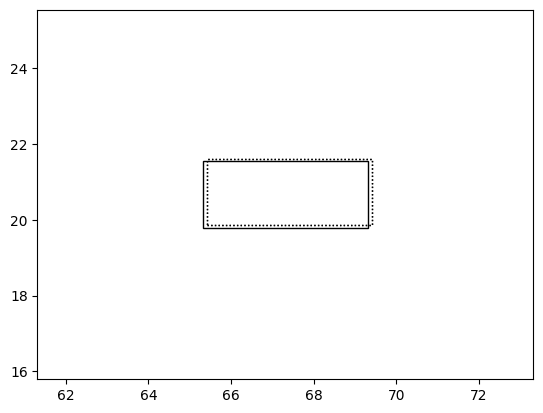

normal [0.15906102 0.84093898]
momentl [ 0.00096528 -0.11461161]
[0.15906102 0.84093898]


C:\Users\mmoussa\AppData\Local\Temp\ipykernel_6728\896333989.py:75: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_6728\896333989.py:107: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_6728\896333989.py:138: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for th

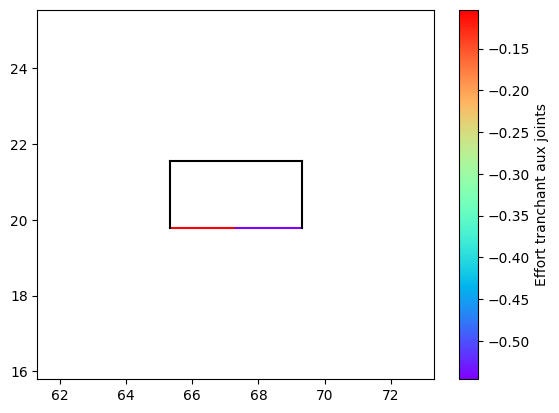

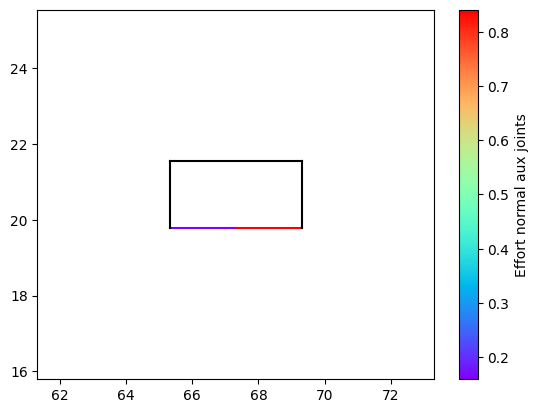

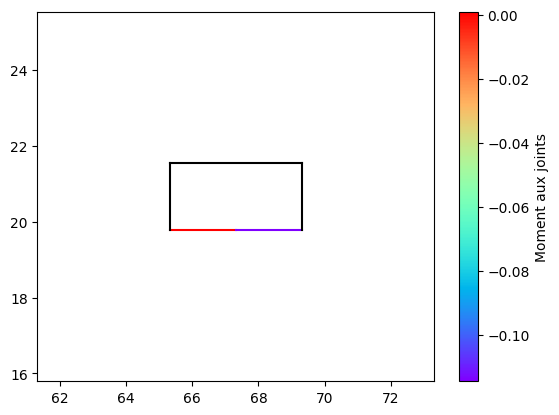

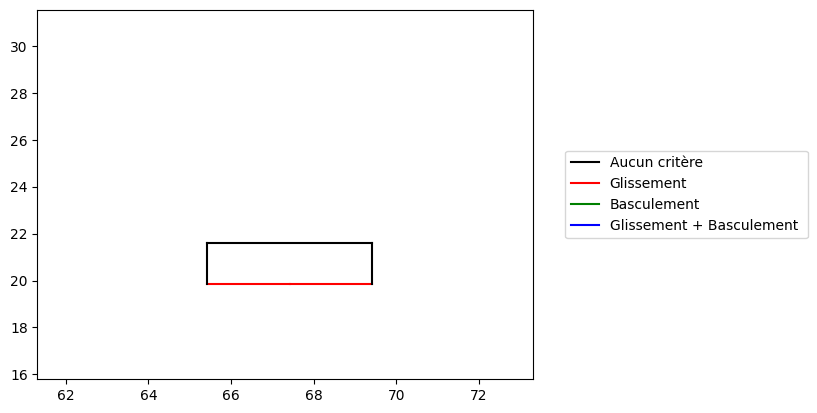

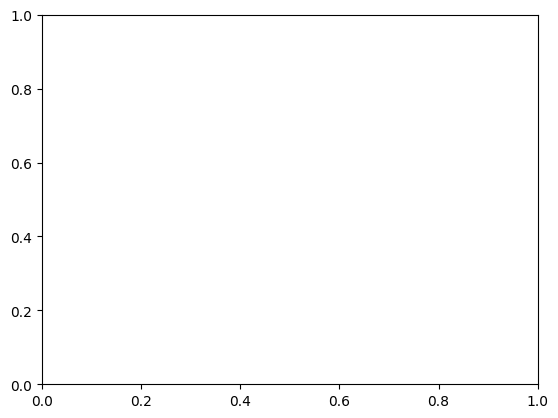

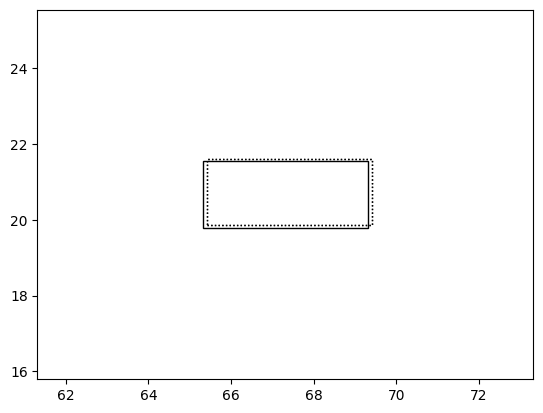

IndexError: index 0 is out of bounds for axis 0 with size 0

In [411]:
kinsol = fourth*0.1
fig, ax = plt.subplots()


for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    ax.add_patch(polygonplot) # plot the blockj

for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    polygonplotdef = polygonplot
    ax.add_patch(polygonplot) # plot the blockj
    (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
    # Create the transformation
    transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
    mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

    # Apply the transformation to the polygon
    polygonplotdef.set_transform(transform)
    #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
    #polygonplot.set_transform(transform)
    ax.add_patch(polygonplotdef) # plot the blockj after displacement


xlimmin = float(nodes[0,1])
xlimmax=  float(nodes[0,1])
ylimmin=  float(nodes[0,2])
ylimmax = float(nodes[0,2])   
for element in range(nodes.shape[0]):
    xlimmin = min([xlimmin,float(nodes[element,1])])
    xlimmax = max([xlimmax,float(nodes[element,1])])
    ylimmin = min([ylimmin,float(nodes[element,2])])
    ylimmax = max([ylimmax,float(nodes[element,2])])

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
plt.savefig('blocksdisp.jpg', dpi=300, format='jpg')
plt.show()


shearvalues = np.empty((0,1))
normalvalues = np.empty((0,1))
momentvalues = np.empty((0,1))
rup_test = np.empty((0,1))
for element in range(0,len(statsol)-2,3):
    shearvalues = np.append(shearvalues,statsol[element])
    normalvalues = np.append(normalvalues,statsol[element+1])
    momentvalues = np.append(momentvalues,statsol[element+2])
    rup_test =  np.append(rup_test,1*(round(abs(statsol[element]),3) >=round(statsol[element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                          2*(round(abs(statsol[element+2]))>=round(statsol[element+1],3) ))
print("normal",normalvalues)
print("momentl",momentvalues)
# Normalize the data
norm = Normalize(vmin=shearvalues.min(), vmax=shearvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(shearvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort tranchant aux joints")
filename = f"shear.jpg"
plt.savefig(filename, dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=normalvalues.min(), vmax=normalvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(normalvalues)
print(normalvalues)
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)

# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort normal aux joints")
filename = f"normal.jpg"
plt.savefig(filename, dpi=300, format='jpg')
fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=momentvalues.min(), vmax=momentvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(momentvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Moment aux joints")
filename = f"moment.jpg"
plt.savefig(filename, dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=rup_test.min(), vmax=rup_test.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(rup_test)

labelcolors = ['k','r','g','b']

def rotate_point(point, center, angle):
    #angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    translated_point = np.array([point[0] - center[0], point[1] - center[1]])
    rotated_point = np.dot(rotation_matrix, translated_point)
    return rotated_point + center

for  element in edgesIndCoor:

    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

        #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
        ind = blockedgesInd[element]-1 #block index 
        indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
    else:
        ind = blockedgesInd[element]-1 #block index
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar


# Add a label to the colorbar
cbar.set_label("Moment aux joints")

leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
labelcolors = ['k','r','g','b']

for i, j in enumerate(leg.legendHandles):

    j.set_color(labelcolors[i])

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+10)
# Create a colorbar
filename = f"rupturejoints.jpg"
plt.savefig(filename, dpi=300, format='jpg')



#len(all_fun)/len(all_fun)
for index in range(0,1):
    
    #kinsol = all_sol[index][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
    
    #a = np.where(all_fun == min(all_fun))

    #print(all_fun[a[0][0]])

    #kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.3
    #Plot results
    kinsol = fourth*0.1
    fig, ax = plt.subplots()



    
    
    fig, ax = plt.subplots()


    for ind, element in enumerate(allpolygons):
        polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
        ax.add_patch(polygonplot) # plot the blockj

    for ind, element in enumerate(allpolygons):
        polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
        polygonplotdef = polygonplot
        ax.add_patch(polygonplot) # plot the blockj
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
        # Create the transformation
        transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
        mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

        # Apply the transformation to the polygon
        polygonplotdef.set_transform(transform)
        #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
        #polygonplot.set_transform(transform)
        ax.add_patch(polygonplotdef) # plot the blockj after displacement


    xlimmin = float(nodes[0,1])
    xlimmax=  float(nodes[0,1])
    ylimmin=  float(nodes[0,2])
    ylimmax = float(nodes[0,2])   
    for element in range(nodes.shape[0]):
        xlimmin = min([xlimmin,float(nodes[element,1])])
        xlimmax = max([xlimmax,float(nodes[element,1])])
        ylimmin = min([ylimmin,float(nodes[element,2])])
        ylimmax = max([ylimmax,float(nodes[element,2])])

    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    filename = f"ruptureblock_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')
    plt.show()


    shearvalues = np.empty((0,1))
    normalvalues = np.empty((0,1))
    momentvalues = np.empty((0,1))
    rup_test = np.empty((0,1))
    for element in range(0,len(statsol)-2,3):
        shearvalues = np.append(shearvalues,all_sol[index][element])
        normalvalues = np.append(normalvalues,all_sol[index][element+1])
        momentvalues = np.append(momentvalues,all_sol[index][element+2])
        rup_test =  np.append(rup_test,1*(round(abs(all_sol[index][element]),3) >=round(all_sol[index][element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                              2*(round(abs(all_sol[index][element+2]),3)>=round(all_sol[index][element+1],3)  ))
    
    print("normal",normalvalues)
    
    # Normalize the data
    boundaries = np.linspace(shearvalues.min(), shearvalues.max(), num=15)

    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')
    # get the color of each element data
    datacolors = sm.to_rgba(shearvalues)

    plt.xlim(0,2)
    plt.ylim(0, 2)
    for  element in edgesIndCoor:
        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
            ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            edgecolor = datacolors[ind][0]
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
        else:
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    # Create a colorbar
    cbar = plt.colorbar(sm)

    # Add a label to the colorbar
    cbar.set_label("Effort tranchant aux joints")
    filename = f"shear_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')

    fig, ax = plt.subplots()

    # Normalize the data
    boundaries = np.linspace(normalvalues.min(), normalvalues.max(), num=15)
    print(normalvalues)
    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')

    # get the color of each element data
    datacolors = sm.to_rgba(normalvalues)

    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    for  element in edgesIndCoor:
        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
            ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            edgecolor = datacolors[ind][0]
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
        else:
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)

    # Create a colorbar
    cbar = plt.colorbar(sm)

    # Add a label to the colorbar
    cbar.set_label("Effort normal aux joints")
    filename = f"Normal_{index}.jpg"

    plt.savefig(filename, dpi=300, format='jpg')
    fig, ax = plt.subplots()

    # Normalize the data
    boundaries = np.linspace(momentvalues.min(), momentvalues.max(), num=15)

    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')

    # get the color of each element data
    datacolors = sm.to_rgba(momentvalues)

    plt.xlim(0,2)
    plt.ylim(0, 2)
    for  element in edgesIndCoor:
        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
            ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            edgecolor = datacolors[ind][0]
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
        else:
            plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    # Create a colorbar
    cbar = plt.colorbar(sm)

    # Add a label to the colorbar
    cbar.set_label("Moment aux joints")
    filename = f"Moment_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')

    fig, ax = plt.subplots()

    # Normalize the data
    boundaries = np.linspace(rup_test.min(), rup_test.max(), num=15)

    # Create a BoundaryNorm object that maps data values to colors based on the boundaries
    norm = BoundaryNorm(boundaries, ncolors=256)
    sm = ScalarMappable(norm=norm, cmap='rainbow')

    # get the color of each element data
    datacolors = sm.to_rgba(rup_test)

    labelcolors = ['k','r','g','b']

    def rotate_point(point, center, angle):
        #angle = np.radians(angle)
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        translated_point = np.array([point[0] - center[0], point[1] - center[1]])
        rotated_point = np.dot(rotation_matrix, translated_point)
        return rotated_point + center

    for  element in edgesIndCoor:

        if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

            #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
            ind = blockedgesInd[element]-1 #block index 
            indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
            (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

            point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
            point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
            plt.plot([point1[0],point2[0]], \
                     [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
        else:
            ind = blockedgesInd[element]-1 #block index
            (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

            point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
            point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
            plt.plot([point1[0],point2[0]], \
                     [point1[1],point2[1]],'k' )

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+4)
    # Create a colorbar


    # Add a label to the colorbar
    cbar.set_label("Moment aux joints")


    leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
    labelcolors = ['k','r','g','b']

    for i, j in enumerate(leg.legendHandles):

        j.set_color(labelcolors[i])

    # Add a colorbar
    plt.xlim(xlimmin-4, xlimmax+4)
    plt.ylim(ylimmin-4, ylimmax+10)
    # Create a colorbar
    filename = f"rupturejoints_{index}.jpg"
    plt.savefig(filename, dpi=300, format='jpg')


In [406]:
print(Astat)
print(normalvalues)
print(momentvalues)
Dead_energie = 0
Dead_energie = sum([Dead_energie  + second[element] for element in range(1,len(second),3)])
print("Dead energie associé", + Dead_energie)
print("live energie associé", + second[0]*statsolver['x'][-1:])

print(np.dot(np.dot(B.T,second).T,statsolver['x'][0:-1:]))
print(np.dot(statsolver['z'].T,coh))

#kinsol = all_sol[index][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
index=3
Dead_energie = 0
Dead_energie = sum([Dead_energie  + all_sol[index][element-Astat.size[0]-Cstat.size[0] ] for element in range(1,len(second),3)])
print("Dead energie associé", + Dead_energie)
print("live energie associé", + all_sol[index][-Astat.size[0]-Cstat.size[0] ]*all_sol[index][Astat.size[1]-1 ])

print("Internal loads",+ np.dot(np.dot(B.T,all_sol[index][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]).T,all_sol[index][0:Astat.size[1]-1]))
print("Prm",+ np.dot(all_sol[index][-Cstat.size[0]:].T,coh))


print(all_fun)
print(-Astat.size[0]-Cstat.size[0])
print(len(all_sol[0]))
print(-Cstat.size[0])
print(all_sol[0][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:])
print(all_sol[2][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:])
energie = 0
for element in range(0,len(third),6):
    energie += abs(third[element] -  third[element+1])
#print( 0.30357615369734203 - energie*0.00001*max(normalvalues))

[ 1.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00  1.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00  0.00e+00  1.00e+00  0.00e+00  0.00e+00]
[ 8.75e-01 -1.00e+00  1.00e+00  8.75e-01  1.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  6.00e+00  0.00e+00 -1.00e+00  6.00e+00  0.00e+00]

[]
[]
Dead energie associé [0.6494076]
live energie associé [[0.6494076]]


ValueError: shapes (6,3) and (4,1) not aligned: 3 (dim 1) != 4 (dim 0)

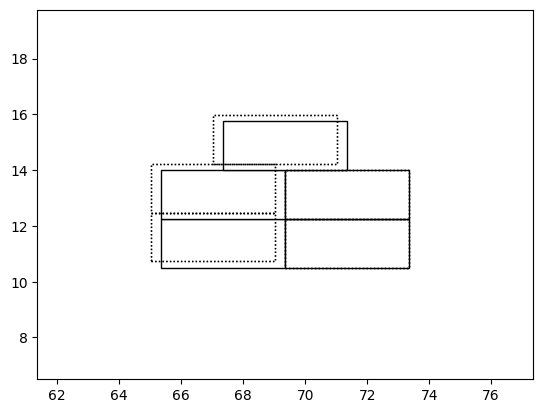

C:\Users\mmoussa\AppData\Local\Temp\ipykernel_17064\4287142329.py:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_17064\4287142329.py:110: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\mmoussa\AppData\Local\Temp\ipykernel_17064\4287142329.py:140: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes 

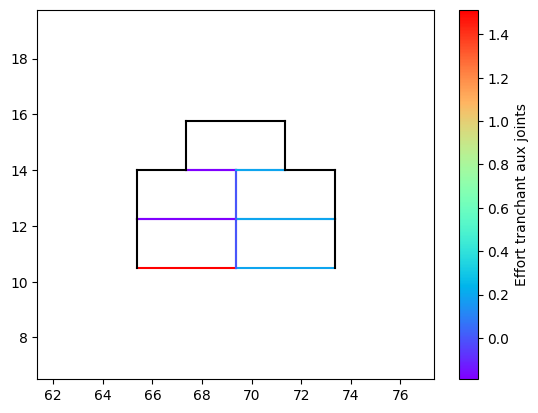

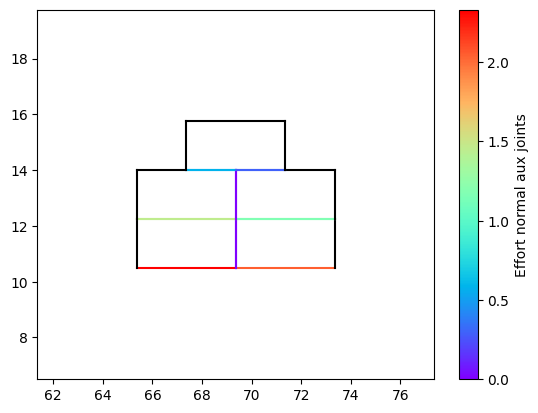

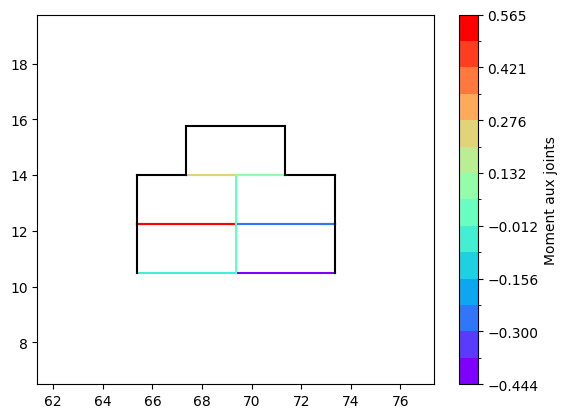

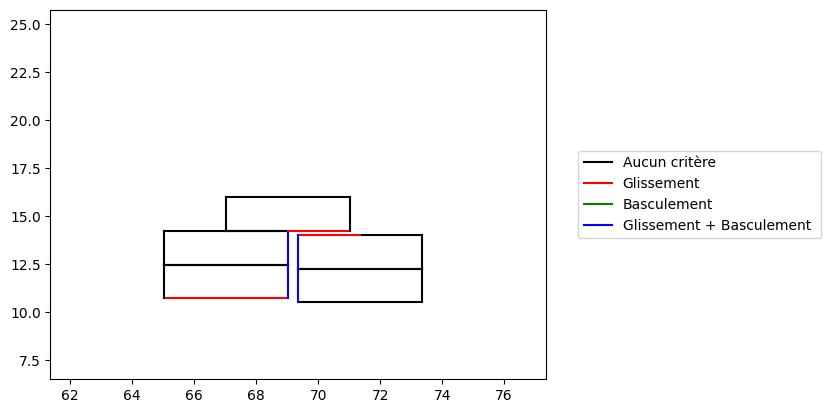

In [61]:
#kinsol = khsolver['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*20
kinsol = resnonlin['x'][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*20
kinsol = fourth*0.3
kinsol = all_sol[80][-Astat.size[0]-Cstat.size[0]:-Cstat.size[0]:]*0.5
#Plot results
fig, ax = plt.subplots()


for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], color='w', lw=1, ec='black', fill='false',) #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    ax.add_patch(polygonplot) # plot the blockj

for ind, element in enumerate(allpolygons):
    polygonplot = Polygon(allpolygons[element], lw=1,linestyle=':', ec='black', fill='false',facecolor="none") #use polygon function of mathplotlib to put the polygon on the suitable form for plotting    
    polygonplotdef = polygonplot
    ax.add_patch(polygonplot) # plot the blockj
    (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])
    # Create the transformation
    transform = mtransforms.Affine2D().translate(-x, -y)+ mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + \
    mtransforms.Affine2D().rotate_deg(kinsol[3*ind+2]*180/3.14) + mtransforms.Affine2D().translate(x, y) + ax.transData

    # Apply the transformation to the polygon
    polygonplotdef.set_transform(transform)
    #transform =  mtransforms.Affine2D().translate(kinsol[3*ind], kinsol[3*ind+1]) + ax.transData
    #polygonplot.set_transform(transform)
    ax.add_patch(polygonplotdef) # plot the blockj after displacement


xlimmin = float(nodes[0,1])
xlimmax=  float(nodes[0,1])
ylimmin=  float(nodes[0,2])
ylimmax = float(nodes[0,2])   
for element in range(nodes.shape[0]):
    xlimmin = min([xlimmin,float(nodes[element,1])])
    xlimmax = max([xlimmax,float(nodes[element,1])])
    ylimmin = min([ylimmin,float(nodes[element,2])])
    ylimmax = max([ylimmax,float(nodes[element,2])])

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
plt.savefig('blocksdisp.jpg', dpi=300, format='jpg')
plt.show()


shearvalues = np.empty((0,1))
normalvalues = np.empty((0,1))
momentvalues = np.empty((0,1))
rup_test = np.empty((0,1))
for element in range(0,len(statsol)-2,3):
    shearvalues = np.append(shearvalues,statsol[element])
    normalvalues = np.append(normalvalues,statsol[element+1])
    momentvalues = np.append(momentvalues,statsol[element+2])
    rup_test =  np.append(rup_test,1*(round(abs(statsol[element]),3) >=round(statsol[element+1]*math.tan(math.radians(phi)) + cohesion,3)) + \
                          2*(round(abs(statsol[element+2]))>=round(statsol[element+1],3) ))


# Normalize the data
norm = Normalize(vmin=shearvalues.min(), vmax=shearvalues.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(shearvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort tranchant aux joints")
plt.savefig('shear.jpg', dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=normalvalues.min(), vmax=normalvalues.max())
# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(normalvalues)

plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)

# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Effort normal aux joints")
plt.savefig('normal.jpg', dpi=300, format='jpg')
fig, ax = plt.subplots()

# Normalize the data
boundaries = np.linspace(momentvalues.min(), momentvalues.max(), num=15)

# Create a BoundaryNorm object that maps data values to colors based on the boundaries
norm = BoundaryNorm(boundaries, ncolors=256)
sm = ScalarMappable(norm=norm, cmap='rainbow')
# get the color of each element data
datacolors = sm.to_rgba(momentvalues)

plt.xlim(0,2)
plt.ylim(0, 2)
for  element in edgesIndCoor:
    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:
        ind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        edgecolor = datacolors[ind][0]
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],color = (edgecolor[0],edgecolor[1],edgecolor[2]) )
    else:
        plt.plot([float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][2])],  [float(edgesIndCoor[element][0][3]),float(edgesIndCoor[element][0][4])],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar
cbar = plt.colorbar(sm)

# Add a label to the colorbar
cbar.set_label("Moment aux joints")
plt.savefig('moment.jpg', dpi=300, format='jpg')

fig, ax = plt.subplots()

# Normalize the data
norm = Normalize(vmin=rup_test.min(), vmax=rup_test.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='rainbow')

# get the color of each element data
datacolors = sm.to_rgba(rup_test)

labelcolors = ['k','r','g','b']

def rotate_point(point, center, angle):
    #angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    translated_point = np.array([point[0] - center[0], point[1] - center[1]])
    rotated_point = np.dot(rotation_matrix, translated_point)
    return rotated_point + center

for  element in edgesIndCoor:

    if not len(np.where(activeEdgesInd == int(edgesIndCoor[element][0][0]))[0]) == 0:

        #edgeind = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0]))[0][0] #find edge index in activeedges array
        ind = blockedgesInd[element]-1 #block index 
        indcol = np.where (activeEdgesInd == int(edgesIndCoor[element][0][0])) #find edge index in activeedges array
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]]+ rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],labelcolors[int(rup_test[indcol])] )
    else:
        ind = blockedgesInd[element]-1 #block index
        (x, y) = (blockscenters[2*ind],blockscenters[2*ind+1])

        point1 = [kinsol[3*ind],kinsol[3*ind+1]] + rotate_point((float(edgesIndCoor[element][0][1]),float(edgesIndCoor[element][0][3])), (x,y), kinsol[3*ind+2])
        point2 = [kinsol[3*ind],kinsol[3*ind+1]]  + rotate_point((float(edgesIndCoor[element][0][2]),float(edgesIndCoor[element][0][4])), (x,y), kinsol[3*ind+2])
        plt.plot([point1[0],point2[0]], \
                 [point1[1],point2[1]],'k' )

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+4)
# Create a colorbar


# Add a label to the colorbar
cbar.set_label("Moment aux joints")

leg = plt.legend(['Aucun critère','Glissement','Basculement' ,'Glissement + Basculement '],loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)
labelcolors = ['k','r','g','b']

for i, j in enumerate(leg.legendHandles):

    j.set_color(labelcolors[i])

# Add a colorbar
plt.xlim(xlimmin-4, xlimmax+4)
plt.ylim(ylimmin-4, ylimmax+10)
# Create a colorbar
plt.savefig('rupture-joints.jpg', dpi=300, format='jpg')



In [2]:
print(ind)

[1]


In [560]:
import pylab
from cvxopt import solvers, matrix, spmatrix, mul, div

def floorplan(Amin):

  
    c = matrix([1.0,1.0] )

    def F(x=None, z=None):
        if x is None:
            return 1, matrix( [2.0,2.0])
        #if min(x) <= 0.0:
         #   print(x)
          #  print("Here")
           # return None
        
        f = -x[0] + div(Amin, x[1])
        Df = matrix([-1,-div(Amin, x[1]**2)]).T
        #Df[0,1] = 1
        if z is None: return f, Df
        H = np.zeros((2,2))
        H[1,:] = matrix(spmatrix( 2.0* mul(z, div(Amin, x[1]**3)), [0], [0]))
        H[1,0] =0
        H = matrix(H)
        return f, Df, H
    A = np.zeros((1,2))
    A[0,0]=1
    A = matrix(A)
    b = matrix([1.0] )
    G = np.zeros((1,2))
    G = matrix(G)
    h = matrix([0.0] )
    sol = solvers.cpl(c, F,G,h,A=A,b=b)
    return  sol['x'][0], sol['x'][1]

Amin = matrix([3.])
x,y = floorplan(Amin)
print(x)
print(y)




     pcost       dcost       gap    pres   dres
 0:  4.0000e+00  3.5000e+00  2e+00  1e+00  2e-01
 1:  3.3739e+00  3.6534e+00  3e-01  3e-01  9e-02
 2:  3.7082e+00  3.9476e+00  5e-03  7e-02  9e-02
 3:  3.9095e+00  3.9942e+00  8e-04  2e-02  3e-02
 4:  3.9896e+00  3.9999e+00  6e-05  2e-03  5e-03
 5:  3.9997e+00  4.0000e+00  1e-06  6e-05  2e-04
 6:  4.0000e+00  4.0000e+00  1e-08  6e-07  2e-06
 7:  4.0000e+00  4.0000e+00  1e-10  6e-09  2e-08
Optimal solution found.
1.00000000013124
2.9999999739403096


     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  4.8800e+02  3e+01  1e+00  1e+00
 1:  4.1434e+00  5.0341e+02  2e+01  9e-01  8e-01
 2:  1.1712e+01  4.7915e+02  2e+01  7e-01  7e-01
 3:  2.1753e+01  4.3806e+02  1e+01  5e-01  6e-01
 4:  3.0392e+01  3.9500e+02  1e+01  5e-01  5e-01
 5:  5.2631e+01  2.6440e+02  5e+00  2e-01  3e-01
 6:  6.9208e+01  1.4271e+02  2e+00  9e-02  2e-01
 7:  7.9553e+01  9.1854e+01  5e-01  3e-02  6e-02
 8:  7.9551e+01  9.1492e+01  5e-01  3e-02  6e-02
 9:  7.9123e+01  9.0414e+01  5e-01  3e-02  5e-02
10:  7.8001e+01  8.8236e+01  5e-01  2e-02  5e-02
11:  7.5977e+01  8.4619e+01  4e-01  2e-02  4e-02
12:  6.9877e+01  7.5752e+01  4e-01  2e-02  3e-02
13:  6.4758e+01  6.9190e+01  2e-01  1e-02  2e-02
14:  6.4419e+01  6.8734e+01  2e-01  1e-02  2e-02
15:  4.9692e+01  5.5697e+01  9e-01  2e-02  7e-03
16:  4.8663e+01  5.3011e+01  6e-01  1e-02  5e-03
17:  4.8482e+01  5.0776e+01  8e-01  1e-02  3e-03
18:  4.7753e+01  4.8788e+01  7e-01  6e-03  2e-03
19:  4.7586e+01  4.83

([], [])

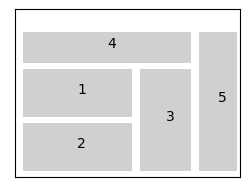

In [477]:
import pylab
from cvxopt import solvers, matrix, spmatrix, mul, div

def floorplan(Amin):

    #     minimize    W+H
    #     subject to  Amink / hk <= wk, k = 1,..., 5
    #                 x1 >= 0,  x2 >= 0, x4 >= 0
    #                 x1 + w1 + rho <= x3
    #                 x2 + w2 + rho <= x3
    #                 x3 + w3 + rho <= x5
    #                 x4 + w4 + rho <= x5
    #                 x5 + w5 <= W
    #                 y2 >= 0,  y3 >= 0,  y5 >= 0
    #                 y2 + h2 + rho <= y1
    #                 y1 + h1 + rho <= y4
    #                 y3 + h3 + rho <= y4
    #                 y4 + h4 <= H
    #                 y5 + h5 <= H
    #                 hk/gamma <= wk <= gamma*hk,  k = 1, ..., 5
    #
    # 22 Variables W, H, x (5), y (5), w (5), h (5).
    #
    # W, H:  scalars; bounding box width and height
    # x, y:  5-vectors; coordinates of bottom left corners of blocks
    # w, h:  5-vectors; widths and heights of the 5 blocks

    rho, gamma = 1.0, 5.0   # min spacing, min aspect ratio

    # The objective is to minimize W + H.  There are five nonlinear
    # constraints
    #
    #     -wk + Amink / hk <= 0,  k = 1, ..., 5

    c = matrix(2*[1.0] + 20*[0.0])

    def F(x=None, z=None):
        if x is None:  return 5, matrix(17*[0.0] + 5*[1.0])
        if min(x[17:]) <= 0.0:  return None
        f = -x[12:17] + div(Amin, x[17:])
        Df = matrix(0.0, (5,22))
        Df[:,12:17] = spmatrix(-1.0, range(5), range(5))
        Df[:,17:] = spmatrix(-div(Amin, x[17:]**2), range(5), range(5))
        if z is None: return f, Df
        
        H = spmatrix( 2.0* mul(z, div(Amin, x[17::]**3)), range(17,22), range(17,22) )
        
        return f, Df, H

    G = matrix(0.0, (26,22))
    h = matrix(0.0, (26,1))
    G[0,2] = -1.0                                       # -x1 <= 0
    G[1,3] = -1.0                                       # -x2 <= 0
    G[2,5] = -1.0                                       # -x4 <= 0
    G[3, [2, 4, 12]], h[3] = [1.0, -1.0, 1.0], -rho     # x1 - x3 + w1 <= -rho
    G[4, [3, 4, 13]], h[4] = [1.0, -1.0, 1.0], -rho     # x2 - x3 + w2 <= -rho
    G[5, [4, 6, 14]], h[5] = [1.0, -1.0, 1.0], -rho     # x3 - x5 + w3 <= -rho
    G[6, [5, 6, 15]], h[6] = [1.0, -1.0, 1.0], -rho     # x4 - x5 + w4 <= -rho
    G[7, [0, 6, 16]] = -1.0, 1.0, 1.0                   # -W + x5 + w5 <= 0
    G[8,8] = -1.0                                       # -y2 <= 0
    G[9,9] = -1.0                                       # -y3 <= 0
    G[10,11] = -1.0                                     # -y5 <= 0
    G[11, [7, 8, 18]], h[11] = [-1.0, 1.0, 1.0], -rho   # -y1 + y2 + h2 <= -rho
    G[12, [7, 10, 17]], h[12] = [1.0, -1.0, 1.0], -rho  #  y1 - y4 + h1 <= -rho
    G[13, [9, 10, 19]], h[13] = [1.0, -1.0, 1.0], -rho  #  y3 - y4 + h3 <= -rho
    G[14, [1, 10, 20]] = -1.0, 1.0, 1.0                 # -H + y4 + h4 <= 0
    G[15, [1, 11, 21]] = -1.0, 1.0, 1.0                 # -H + y5 + h5 <= 0
    G[16, [12, 17]] = -1.0, 1.0/gamma                   # -w1 + h1/gamma <= 0
    G[17, [12, 17]] = 1.0, -gamma                       #  w1 - gamma * h1 <= 0
    G[18, [13, 18]] = -1.0, 1.0/gamma                   # -w2 + h2/gamma <= 0
    G[19, [13, 18]] = 1.0, -gamma                       #  w2 - gamma * h2 <= 0
    G[20, [14, 19]] = -1.0, 1.0/gamma                   # -w3 + h3/gamma <= 0
    G[21, [14, 19]] = 1.0, -gamma                       #  w3 - gamma * h3 <= 0
    G[22, [15, 20]] = -1.0, 1.0/gamma                   # -w4  + h4/gamma <= 0
    G[23, [15, 20]] = 1.0, -gamma                       #  w4 - gamma * h4 <= 0
    G[24, [16, 21]] = -1.0, 1.0/gamma                   # -w5 + h5/gamma <= 0
    G[25, [16, 21]] = 1.0, -gamma                       #  w5 - gamma * h5 <= 0.0

    # solve and return W, H, x, y, w, h
    sol = solvers.cpl(c, F, G, h)
    return  sol['x'][0], sol['x'][1], sol['x'][2:7], sol['x'][7:12], sol['x'][12:17], sol['x'][17:]

pylab.figure(facecolor='w')
pylab.subplot(221)
Amin = matrix([100., 100., 100., 100., 100.])
W, H, x, y, w, h =  floorplan(Amin)
for k in range(5):
    pylab.fill([x[k], x[k], x[k]+w[k], x[k]+w[k]],
               [y[k], y[k]+h[k], y[k]+h[k], y[k]], facecolor = '#D0D0D0')
    pylab.text(x[k]+.5*w[k], y[k]+.5*h[k], "%d" %(k+1))
pylab.axis([-1.0, 26, -1.0, 26])
pylab.xticks([])
pylab.yticks([])



In [193]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return (x[0] + x[1])

def constraint(x):
    
    return [-2 + x[0] * x[1], -3 + x[0] * x[1],-1]

x0 = 1*np.array([0.5, 0.5])
b = (0.0, None)
bnds = (b, b)
A = np.array([1,1])
b = np.array([5])
LinearConstraint (A,b,b)
con = {'type': 'ineq', 'fun': constraint}
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=[con])
print(sol)
print("The solution is:", sol.x)



 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 1.0
       x: [ 5.000e-01  5.000e-01]
     nit: 5
     jac: [ 1.000e+00  1.000e+00]
    nfev: 3
    njev: 1
The solution is: [0.5 0.5]


In [56]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return -(x[0] + 5*x[1])

def constraint1(x):
    return 6 - x.T @ [3,4]

def constraint2(x):
    return  x.T @ [1,3] - 2

x0 = np.array([0.5, 0.5])
b = (0.0, None)
bnds = (b, b)
con1['1'] = {'type': 'ineq', 'fun': constraint1}
con1['2'] = {'type': 'ineq', 'fun': constraint2}
constraints = []
for i in range(2):
    constraints = [*constraints,con1[str(i+1)]]
print(type(con1))
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=constraints)
print(sol)
print(sol.x)
if (constraint1(sol.x) >= -0.1) and (constraint2(sol.x) >= -0.1):
    print("All constraints are satisfied.")
else:
    print("Not all constraints are satisfied.")



<class 'dict'>
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -7.500000000000011
       x: [ 3.331e-15  1.500e+00]
     nit: 2
     jac: [-1.000e+00 -5.000e+00]
    nfev: 6
    njev: 2
[3.33066907e-15 1.50000000e+00]
All constraints are satisfied.


In [95]:
from scipy.optimize import minimize, LinearConstraint
import numpy as np

def f(x):
    return x.T @ [1,2]

A = np.array([[2, 1], [1, 2]])
b = np.array([5, 5])
c = np.array([5, 5])
print(A.shape,len(c),len(b))
linear_constraint = LinearConstraint(A, c,b)
x0 = np.array([1, 1])
res = minimize(f, x0, constraints=linear_constraint)
print(res)

(2, 2) 2 2
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 5.0
       x: [ 1.667e+00  1.667e+00]
     nit: 2
     jac: [ 1.000e+00  2.000e+00]
    nfev: 6
    njev: 2


In [1]:
##
#  Copyright : Copyright (c) MOSEK ApS, Denmark. All rights reserved.
#
#  File :      lo1.py
#
#  Purpose :   Demonstrates how to solve small linear
#              optimization problem using the MOSEK Python API.
##
import sys
import mosek

# Since the value of infinity is ignored, we define it solely
# for symbolic purposes
inf = 0.0

# Define a stream printer to grab output from MOSEK
def streamprinter(text):
    sys.stdout.write(text)
    sys.stdout.flush()


def main():
    # Create a task object
    with mosek.Task() as task:
        # Attach a log stream printer to the task
        task.set_Stream(mosek.streamtype.log, streamprinter)

        # Bound keys for constraints
        bkc = [mosek.boundkey.up,
               mosek.boundkey.up,
               mosek.boundkey.up]

        # Bound values for constraints
        blc = [-inf, -inf, -inf]
        buc = [18.0, 8.0, 14.0]

        # Bound keys for variables
        bkx = [mosek.boundkey.lo,
               mosek.boundkey.lo,
             ]

        # Bound values for variables
        blx = [0.0, 0.0]
        bux = [+inf, +inf]

        # Objective coefficients
        c = [20.0,30.0]

        # Below is the sparse representation of the A
        # matrix stored by column.
        asub = [[0, 1,2],
                [0, 1,2]
               ]
        aval = [[1.0,1.0,2.0],
                [3.0,1.0,1.0]
               ]
        numvar = len(blx)
        numcon = len(blc)
        #numvar = len(bkx)
        #numcon = len(bkc)

        # Append 'numcon' empty constraints.
        # The constraints will initially have no bounds.
        task.appendcons(numcon)

        # Append 'numvar' variables.
        # The variables will initially be fixed at zero (x=0).
        task.appendvars(numvar)

        for j in range(numvar):
            # Set the linear term c_j in the objective.
            task.putcj(j, c[j])

            # Set the bounds on variable j
            # blx[j] <= x_j <= bux[j]
            task.putvarbound(j, bkx[j], blx[j], bux[j])

            # Input column j of A
            task.putacol(j,                  # Variable (column) index.
                         asub[j],            # Row index of non-zeros in column j.
                         aval[j])            # Non-zero Values of column j.

        # Set the bounds on constraints.
         # blc[i] <= constraint_i <= buc[i]
        for i in range(numcon):
            task.putconbound(i, bkc[i], blc[i], buc[i])

        # Input the objective sense (minimize/maximize)
        task.putobjsense(mosek.objsense.maximize)

        # Solve the problem
        task.optimize()
        # Print a summary containing information
        # about the solution for debugging purposes
        task.solutionsummary(mosek.streamtype.msg)

        # Get status information about the solution
        solsta = task.getsolsta(mosek.soltype.bas)

        if (solsta == mosek.solsta.optimal):
            xx = task.getxx(mosek.soltype.bas)
            
            print("Optimal solution: ")
            for i in range(numvar):
                print("x[" + str(i) + "]=" + str(xx[i]))
        elif (solsta == mosek.solsta.dual_infeas_cer or
              solsta == mosek.solsta.prim_infeas_cer):
            print("Primal or dual infeasibility certificate found.\n")
        elif solsta == mosek.solsta.unknown:
            print("Unknown solution status")
        else:
            print("Other solution status")


# call the main function
try:
    main()
except mosek.Error as e:
    print("ERROR: %s" % str(e.errno))
    if e.msg is not None:
        print("\t%s" % e.msg)
        sys.exit(1)
except:
    import traceback
    traceback.print_exc()
    sys.exit(1)



MOSEK error 1008: License cannot be located. The default search path is ';C:\Users\mmoussa\mosek\mosek.lic;'.

*** A FLEXlm error occurred. FLEXlm reported:



*** end of FLEXlm report.

ERROR: rescode.err_missing_license_file
	License cannot be located. The default search path is ';C:\Users\mmoussa\mosek\mosek.lic;'.


AssertionError: 

In [ ]:


from shapely.geometry import Point
from scipy.spatial import ConvexHull
hull = ConvexHull([(0,0,0),(1,1,0),(1,0,0),(0,1,0),(0,0,2),(1,1,2),(1,0,2),(0,1,2)])
print(hull.vertices)
print(hull.volume)

In [1]:
import cvxpy as cp

x = cp.Variable(2)
obj = cp.Minimize(cp.sum_squares(x))
constraints = [x[0] + x[1] == 1, x[0] - x[1] >= 1]

prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.MOSEK)


Error: rescode.err_missing_license_file(1008): License cannot be located. The default search path is ';C:\Users\mmoussa\mosek\mosek.lic;'.

In [35]:
import numpy as np

def is_point_inside_polygon(point, polygon):
    """
    Test whether a point is inside a polygon.

    Args:
        point: a tuple or array representing the (x, y) coordinates of the point
        polygon: a list of tuples or arrays representing the (x, y) coordinates of the vertices of the polygon

    Returns:
        True if the point is inside the polygon, False otherwise.
    """
    # Choose a reference point that does not lie on the polygon
    reference_point = np.array([point[0] + 1, point[1]])

    # Calculate the normal vector of the polygon at the reference point
    normal = np.array([0, 0, 1])
    for i in range(len(polygon)):
        v1 = np.array(polygon[i]) - reference_point
        v2 = np.array(polygon[(i+1)%len(polygon)]) - reference_point
        normal += np.cross(v1, v2)

    # Check the sign of each cross product
    for i in range(len(polygon)):
        v1 = np.array(polygon[i]) - np.array(point)
        v2 = np.array(polygon[(i+1)%len(polygon)]) - np.array(point)
        cross_product = np.cross(v1, v2)
        if np.dot(cross_product, normal) < 0:
            return False

    # If all cross products have the same sign, the point is inside the polygon
    return True

is_point_inside_polygon([1,1.5],[(0,0),(3,0),(3,1),(0,1)])

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [100]:
print(np.random.rand(5))


[0.285771   0.69365318 0.38094722 0.80616978 0.79572462]


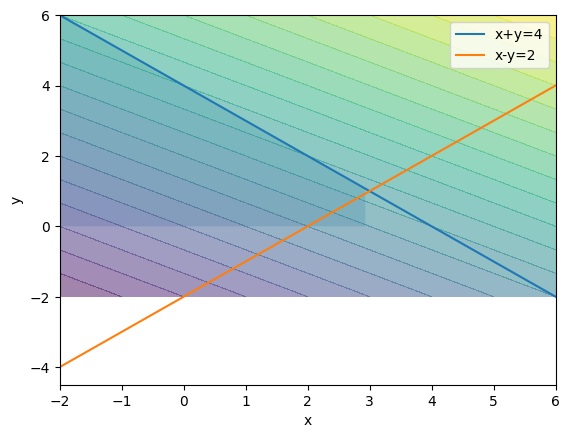

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lines
x = np.linspace(-2, 6, 100)
y1 = 4 - x
y2 = x - 2

# Plot the lines
plt.plot(x, y1, label='x+y=4')
plt.plot(x, y2, label='x-y=2')

# Plot the feasible region
plt.fill_between(x, np.maximum(y1, y2), np.maximum(y1*0, y2*0), where=(y1>y2), alpha=0.2)

# Plot the objective function
x, y = np.meshgrid(np.linspace(-2, 6, 50), np.linspace(-2, 6, 50))
z = 2*x + 3*y
plt.contourf(x, y, z, levels=20, alpha=0.5)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [4]:
import sys
sys.path.append(r'C:\GAMS\42\api')
import gams


ModuleNotFoundError: No module named 'gams'

ModuleNotFoundError: No module named 'gams'

ModuleNotFoundError: No module named 'scipy'

In [389]:
import sympy as sp

# Define the symbols and constants
sigmamin = sp.symbols('sigmamin')
sigmamax = sp.symbols('sigmamax')

L = sp.symbols('L', real=True, positive=True)

# Define the integrand
f = sp.exp(-a*x**2)
f = (L/2-x)*(sigmamin + (sigmamax-sigmamin)/L*x)
# Integrate the function with respect to x
result = sp.integrate(f, (x, 0, L))

# Print the result
print("The integral of exp(-a*x^2) from 0 to L is:", sp.simplify(result))




The integral of exp(-a*x^2) from 0 to L is: L**2*(-sigmamax + sigmamin)/12


In [390]:
import sympy as sp

# Define the symbolic variables
sigmamax, sigmamin = sp.symbols('sigmamax sigmamin')
L = sp.symbols('L', real=True, positive=True)
N = sp.symbols('N')
M = sp.symbols('M')
# Define the equations
eq1 = sp.Eq(sigmamax*L/2 + sigmamin*L/2, N)
eq2 = sp.Eq(sigmamin*L**2/2 + (sigmamax-sigmamin)*L**2/6, M)
eq2 = sp.Eq(result, M)
# Solve the system of equations
sol = sp.solve((eq1, eq2), (sigmamin, sigmamax))

# Print the solution
print("The solution to the system of equations is:", sol)


The solution to the system of equations is: {sigmamin: (L*N + 6*M)/L**2, sigmamax: (L*N - 6*M)/L**2}
